In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline

import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
# from scipy.optimize import curve_fit
# from scipy.stats import norm
import matplotlib.mlab as mlab
# from pylab import rcParams
#import seaborn as sns
#sns.set()


# from root_numpy import root2array, tree2array,testdata
# from root_pandas import read_root
# from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
# from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
# myfile_beam_off='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_EXTC1C2_hadd_hist.root'
# myfile_beam_on='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_5E19_hadd_hist.root'
# myfile_Overlay='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_OVERLAY_hadd_hist.root'
myfile_lyattn='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2lyattn_hadd_hist.root'
myfile_lydown='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2lydown_hadd_hist.root'
myfile_lyrayleigh='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2lyrayleigh_hadd_hist.root'
# myfile_wiremodaxz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodaxz_hadd_hist.root'
# myfile_wiremodayz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodayz_hadd_hist.root'
# myfile_wiremodx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodx_hadd_hist.root'
# myfile_wiremodyz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodyz_hadd_hist.root'
# myfile_wiremoddedx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremoddedx_hadd_hist.root'
myfile_wiremodaxz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodaxz_lt_hadd_hist.root'
myfile_wiremodayz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodayz_lt_hadd_hist.root'
myfile_wiremodx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodx_lt_hadd_hist.root'
myfile_wiremodyz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodyz_lt_hadd_hist.root'
myfile_wiremoddedx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremoddedx_lt_hadd_hist.root'
myfile_beam_off='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_EXTC1C2_hadd_noG10_hist.root'
myfile_beam_on='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_5E19_hadd_noG10_hist.root'
myfile_Overlay='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_OVERLAY_hadd_noG10_hist.root'


In [4]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'

TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"
TREE_HIT="Hittree"
TREE_POT="potTree"

# BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
# BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [5]:
NUSELECTION_event = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7'# and tracklength>20'# and Event_cluster_charge>5 and sps_cluster_charge10>5 and sps_cluster_charge20>5 and sps_cluster_charge50>5' # and tracklength>20 and distance_nu_smallest>15'
# NUSELECTION_sps = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7'# and tracklength>20'# and sps_cluster_charge>5 ' # and tracklength>20 and distance_nu_smallest>15'
# NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7 ' # and tracklength>20 and distance_nu_smallest>15'

In [6]:
df_Event_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_EVENT]
# df_Sps_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_SPS]

# df_Event_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_EVT))
# df_Sps_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_SPS))

print(len(df_Event_beam_on))

df_Event_beam_on = df_Event_beam_on.pandas.df().query(NUSELECTION_event)
# df_Sps_beam_on = df_Sps_beam_on.pandas.df().query(NUSELECTION_sps)


print(len(df_Event_beam_on))


39386
1074


In [7]:
df_Event_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_EVENT]
# df_Sps_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_SPS]

# df_Event_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_EVT))
# df_Sps_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_SPS))
print(len(df_Event_beam_off))

df_Event_beam_off = df_Event_beam_off.pandas.df().query(NUSELECTION_event)
# df_Sps_beam_off = df_Sps_beam_off.pandas.df().query(NUSELECTION_sps)

print(len(df_Event_beam_off))


112634
615


In [8]:
df_Event_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_EVENT]
df_Event_lyattn=uproot.open(myfile_lyattn)[folder_corr][TREE_EVENT]
df_Event_lydown=uproot.open(myfile_lydown)[folder_corr][TREE_EVENT]
df_Event_lyrayleigh=uproot.open(myfile_lyrayleigh)[folder_corr][TREE_EVENT]
df_Event_wiremodaxz=uproot.open(myfile_wiremodaxz)[folder_corr][TREE_EVENT]
df_Event_wiremodayz=uproot.open(myfile_wiremodayz)[folder_corr][TREE_EVENT]
df_Event_wiremodyz=uproot.open(myfile_wiremodyz)[folder_corr][TREE_EVENT]
df_Event_wiremodx=uproot.open(myfile_wiremodx)[folder_corr][TREE_EVENT]
df_Event_wiremoddedx=uproot.open(myfile_wiremoddedx)[folder_corr][TREE_EVENT]



# df_Sps_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_SPS]

# df_Event_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_EVT))
# df_Sps_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_SPS))


print(len(df_Event_overlay))
df_Event_overlay = df_Event_overlay.pandas.df().query(NUSELECTION_event)
# df_Sps_overlay = df_Sps_overlay.pandas.df().query(NUSELECTION_sps)
print(len(df_Event_overlay))
df_Event_lyattn=df_Event_lyattn.pandas.df().query(NUSELECTION_event)
df_Event_lydown=df_Event_lydown.pandas.df().query(NUSELECTION_event)
df_Event_lyrayleigh=df_Event_lyrayleigh.pandas.df().query(NUSELECTION_event)
df_Event_wiremodaxz=df_Event_wiremodaxz.pandas.df().query(NUSELECTION_event)
df_Event_wiremodayz=df_Event_wiremodayz.pandas.df().query(NUSELECTION_event)
df_Event_wiremodyz=df_Event_wiremodyz.pandas.df().query(NUSELECTION_event)
df_Event_wiremodx=df_Event_wiremodx.pandas.df().query(NUSELECTION_event)
df_Event_wiremoddedx=df_Event_wiremoddedx.pandas.df().query(NUSELECTION_event)


102750
2358


In [9]:
df_Event_beam_off.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,distance_smallest_nu,N_sps,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_cosmic_smallest,cosmic_trk_50,N_Run,N_SubRun
entry,,,,,,,,,,,,,,,,,,,,,
710,1466941010,150.631683,47.353653,367.467804,166.794056,-109.551537,401.676930,23.851191,555.173354,85,...,1,-0.316709,0.453041,0.833336,120.587624,222.077203,90.885544,0,6672,57
904,1456187452,131.534683,7.237651,551.826233,85.386048,-70.957467,972.028284,112.988801,375.804612,73,...,2,0.071485,0.478649,0.875092,77.577705,622.429312,98.882575,0,5106,151
1009,1465353677,103.857689,-51.309978,646.397583,175.558842,-93.691310,126.621468,77.934528,366.007332,71,...,1,-0.432011,0.356770,0.828301,12.256063,243.467529,51.321487,0,6506,194
1109,1467771355,66.395538,63.193584,572.124451,230.521631,-74.551625,700.024184,63.939695,385.068217,88,...,1,-0.539621,0.451178,0.710807,89.940887,233.844217,51.844590,0,6797,23
1111,1468126462,144.885757,59.104965,493.149994,206.012743,114.804054,557.797490,115.554269,442.202586,73,...,3,0.261693,0.645485,0.717542,79.544464,210.679669,190.233875,0,6830,53


In [10]:
df_POT_Overlay =uproot.open(myfile_Overlay)[folder_corr][TREE_POT]
df_POT_Overlay = df_POT_Overlay.pandas.df()
df_POT_Overlay.head()
POT_OVERLAY = np.sum(df_POT_Overlay['sr_pot'].values)

df_POT_lyattn =uproot.open(myfile_lyattn)[folder_corr][TREE_POT]
df_POT_lyattn = df_POT_lyattn.pandas.df()
POT_lyattn = np.sum(df_POT_lyattn['sr_pot'].values)

df_POT_lydown =uproot.open(myfile_lydown)[folder_corr][TREE_POT]
df_POT_lydown = df_POT_lydown.pandas.df()
POT_lydown = np.sum(df_POT_lydown['sr_pot'].values)

df_POT_lyrayleigh =uproot.open(myfile_lyrayleigh)[folder_corr][TREE_POT]
df_POT_lyrayleigh = df_POT_lyrayleigh.pandas.df()
POT_lyrayleigh = np.sum(df_POT_lyrayleigh['sr_pot'].values)

df_POT_wiremodaxz =uproot.open(myfile_wiremodaxz)[folder_corr][TREE_POT]
df_POT_wiremodaxz = df_POT_wiremodaxz.pandas.df()
POT_wiremodaxz = np.sum(df_POT_wiremodaxz['sr_pot'].values)

df_POT_wiremodayz =uproot.open(myfile_wiremodayz)[folder_corr][TREE_POT]
df_POT_wiremodayz = df_POT_wiremodayz.pandas.df()
POT_wiremodayz = np.sum(df_POT_wiremodayz['sr_pot'].values)

df_POT_wiremodx =uproot.open(myfile_wiremodx)[folder_corr][TREE_POT]
df_POT_wiremodx = df_POT_wiremodx.pandas.df()
POT_wiremodx = np.sum(df_POT_wiremodx['sr_pot'].values)

df_POT_wiremodyz =uproot.open(myfile_wiremodyz)[folder_corr][TREE_POT]
df_POT_wiremodyz = df_POT_wiremodyz.pandas.df()
POT_wiremodyz = np.sum(df_POT_wiremodyz['sr_pot'].values)

df_POT_wiremoddedx =uproot.open(myfile_wiremoddedx)[folder_corr][TREE_POT]
df_POT_wiremoddedx = df_POT_wiremoddedx.pandas.df()
POT_wiremoddedx = np.sum(df_POT_wiremoddedx['sr_pot'].values)



print POT_OVERLAY
print POT_lyattn
print POT_lydown
print POT_lyrayleigh
print POT_wiremodaxz
print POT_wiremodayz
print POT_wiremodx
print POT_wiremodyz
print POT_wiremoddedx


1.2704006713643901e+20
5.369140342745553e+19
5.3646266965239734e+19
5.381732616460735e+19
5.199547901531009e+19
5.192007921398634e+19
5.20482002843958e+19
5.191782407199356e+19
5.1913495432196596e+19


In [11]:
#This info provided by David C.

BNB_POT= 4.54E19
BNB_triggers=10080350.0
C1_triggers=33682387.0
C2_triggers=31816420.0
EXT_triggers=C1_triggers+C2_triggers
print EXT_triggers
#The off-beam normalization is = [BNB #triggers] / [EXT #triggers]
off_scaling=(BNB_triggers/EXT_triggers)
print off_scaling
#0.1539012764
#The overlay normalization is = [BNB POT] / [Overlay POT]
overlay_scaling=(BNB_POT/POT_OVERLAY)
print(overlay_scaling)
#0.35719987283306953


lyattn_scaling=POT_OVERLAY/POT_lyattn
lydown_scaling=POT_OVERLAY/POT_lydown
lyrayleigh_scaling=POT_OVERLAY/POT_lyrayleigh
wiremodaxz_scaling=POT_OVERLAY/POT_wiremodaxz
wiremodayz_scaling=POT_OVERLAY/POT_wiremodayz
wiremodx_scaling=POT_OVERLAY/POT_wiremodx
wiremodyz_scaling=POT_OVERLAY/POT_wiremodyz
wiremoddedx_scaling=POT_OVERLAY/POT_wiremoddedx




65498807.0
0.1539012764
0.3573675693294551


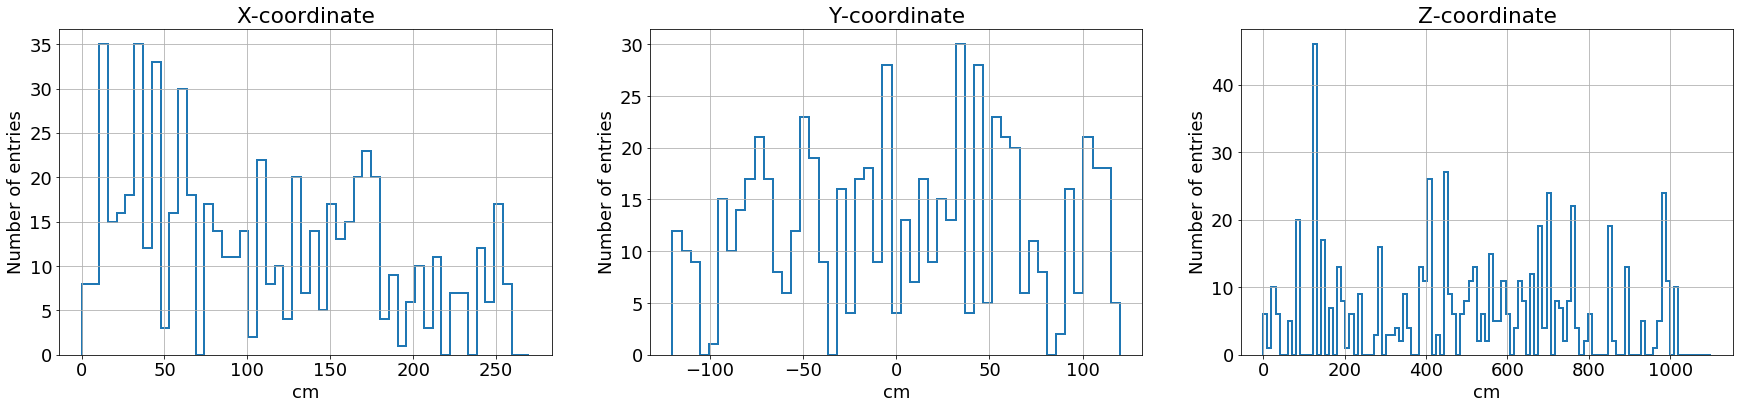

In [12]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(0,270,52)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Event_beam_off['_rand_vtx_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("X-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(-120,120,50)
plt.hist(df_Event_beam_off['_rand_vtx_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Y-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1100,110)
plt.hist(df_Event_beam_off['_rand_vtx_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Z-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

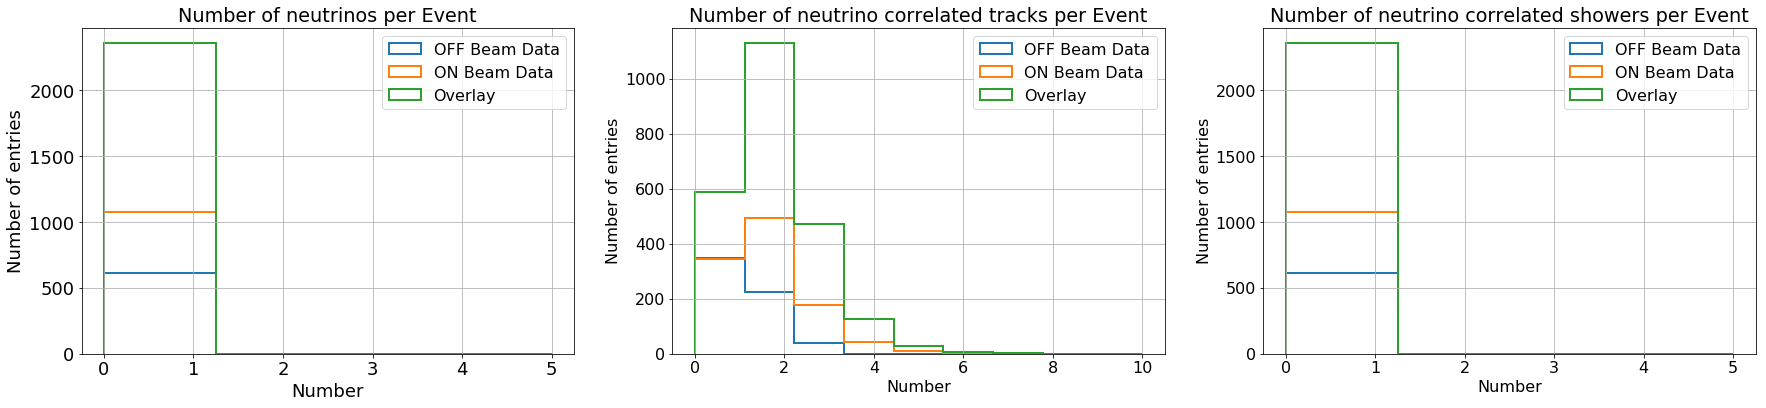

In [13]:
BINS = np.linspace(0,5,5)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of neutrinos per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)
BINS = np.linspace(0,10,10)
plt.hist(df_Event_beam_off['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of neutrino correlated tracks per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 3)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_beam_off['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of neutrino correlated showers per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=500)

In [14]:
on_beam_neutrinos=len(df_Event_beam_on.query('neutrinos>0'))
print on_beam_neutrinos
off_beam_neutrinos=len(df_Event_beam_off.query('neutrinos>0'))
print off_beam_neutrinos
overlay_neutrinos=len(df_Event_overlay.query('neutrinos>0'))
print overlay_neutrinos

off_scaling_neutrino=(on_beam_neutrinos/float(off_beam_neutrinos))*off_scaling
overlay_scaling_neutrino=(on_beam_neutrinos/float(overlay_neutrinos))*overlay_scaling


print off_scaling_neutrino
print overlay_scaling_neutrino


off_beam_neutrinos_POT_scaled=off_beam_neutrinos*off_scaling
overlay_neutrinos_POT_scaled=overlay_neutrinos*overlay_scaling

on_scaling_neutrino= on_beam_neutrinos/float(off_beam_neutrinos_POT_scaled + overlay_neutrinos_POT_scaled)
print on_scaling_neutrino

1074
615
2358
0.26876418025
0.1627704705088358
1.1458175361


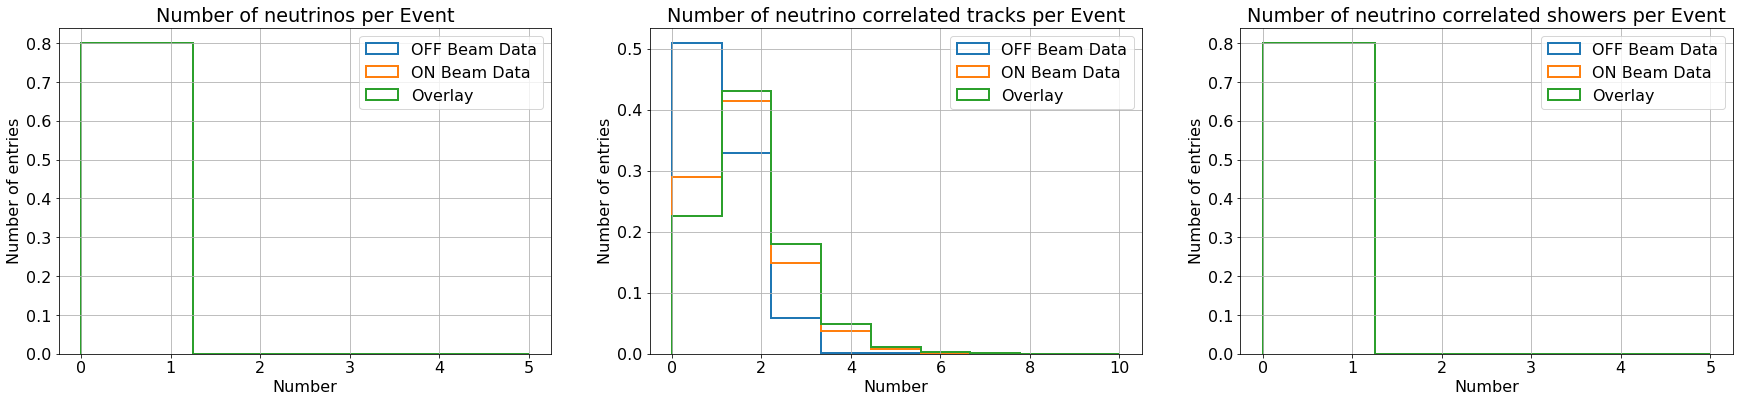

In [15]:
BINS = np.linspace(0,5,5)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of neutrinos per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)
BINS = np.linspace(0,10,10)
plt.hist(df_Event_beam_off['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of neutrino correlated tracks per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 3)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_beam_off['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of neutrino correlated showers per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=500)

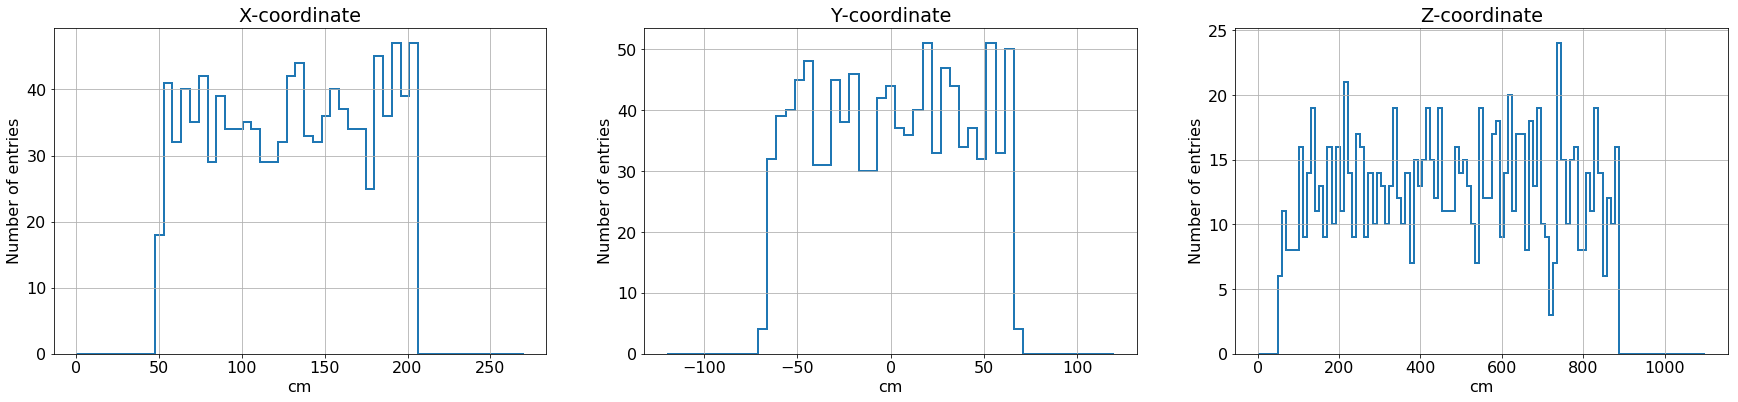

In [16]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(0,270,52)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Event_beam_on['Vertex_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("X-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(-120,120,50)
plt.hist(df_Event_beam_on['Vertex_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Y-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1100,110)
plt.hist(df_Event_beam_on['Vertex_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Z-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
# fig.savefig('distance_smallest', dpi=500)

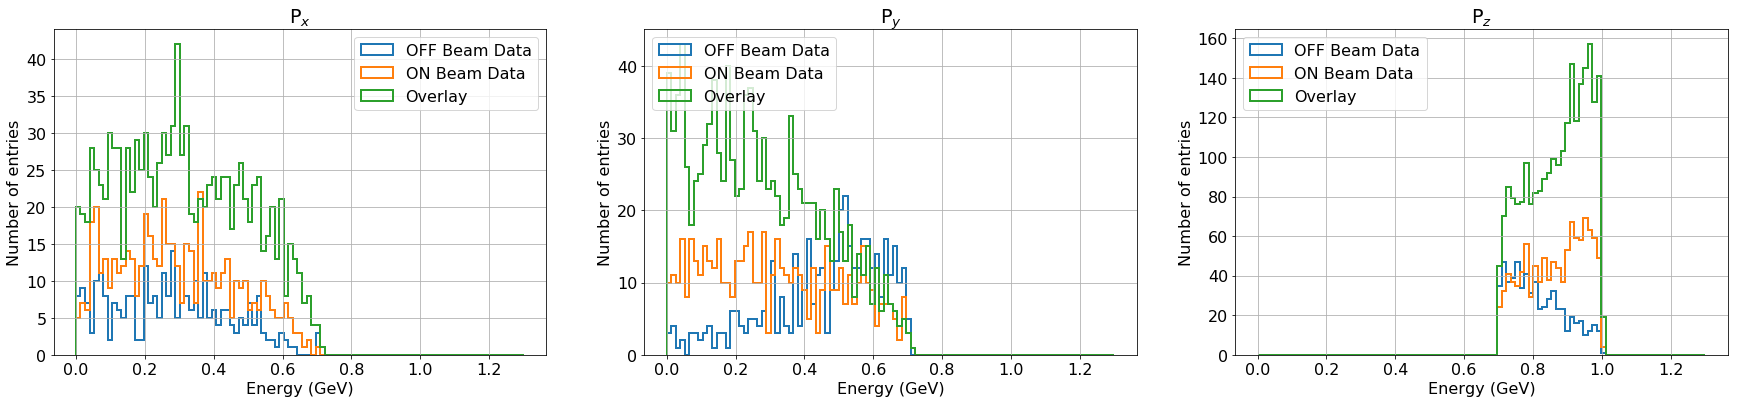

In [17]:

#Momentum values for the longest track from the neutrino vertex (muon)
BINS = np.linspace(0,1.3,100)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['muon_px'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['muon_px'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['muon_px'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("P$_{x}$")
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)

plt.hist(df_Event_beam_off['muon_py'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['muon_py'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['muon_py'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("P$_{y}$")
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.subplot(1, 3, 3)

plt.hist(df_Event_beam_off['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("P$_{z}$")
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()
#pz>0.7
# fig.savefig('hist.png', dpi=500)

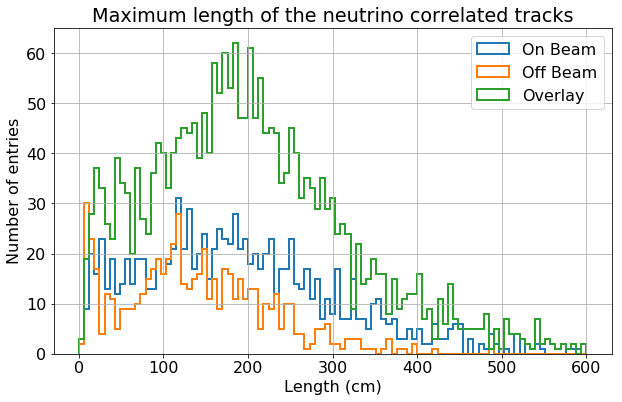

In [18]:
BINS = np.linspace(0,600,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Maximum length of the neutrino correlated tracks")
plt.xlabel('Length (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

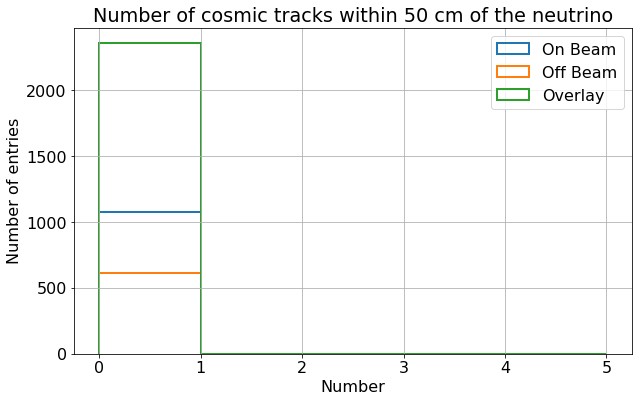

In [19]:
BINS = np.linspace(0,5,6)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['cosmic_trk_50'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['cosmic_trk_50'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['cosmic_trk_50'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Number of cosmic tracks within 50 cm of the neutrino")
plt.xlabel('Number')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

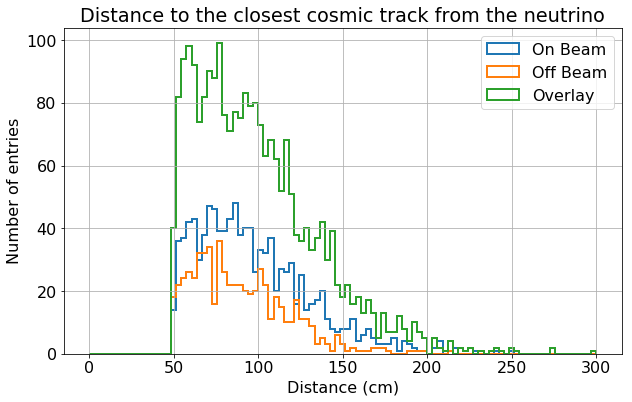

In [20]:
BINS = np.linspace(0,300,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['distance_nu_cosmic_smallest'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['distance_nu_cosmic_smallest'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['distance_nu_cosmic_smallest'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Distance to the closest cosmic track from the neutrino")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

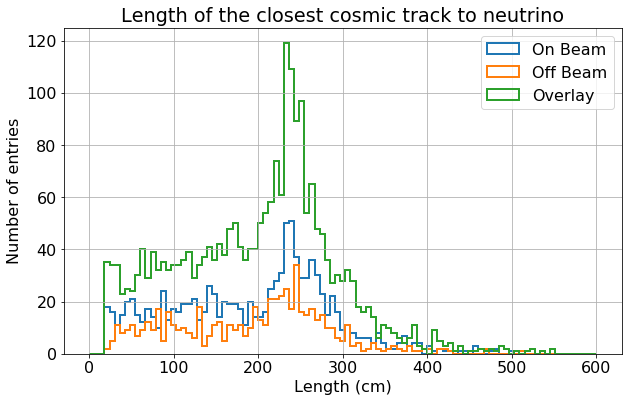

In [21]:
BINS = np.linspace(0,600,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['tracklength'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['tracklength'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['tracklength'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Length of the closest cosmic track to neutrino")
plt.xlabel('Length (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

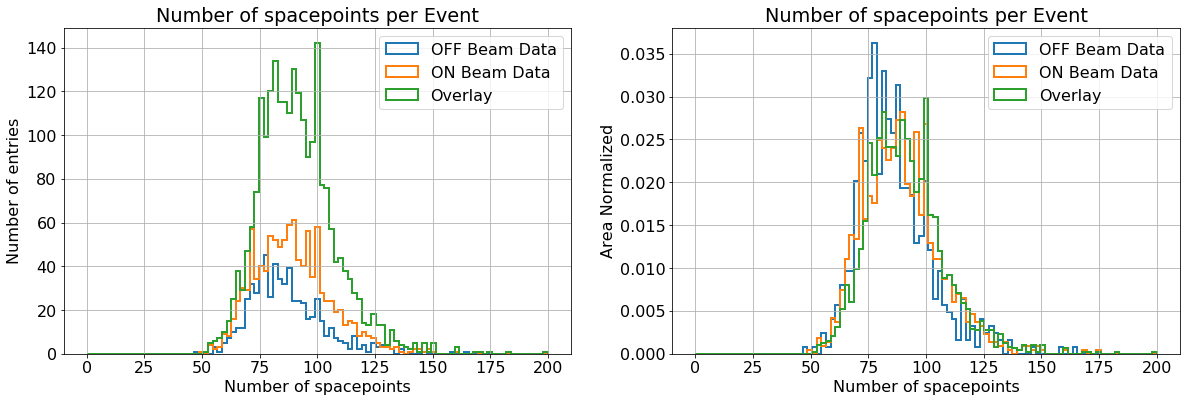

In [22]:
BINS = np.linspace(0,200,100)

fig = plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['N_sps'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['N_sps'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 2, 2)
plt.hist(df_Event_beam_off['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()
fig.savefig('hist.png', dpi=500)

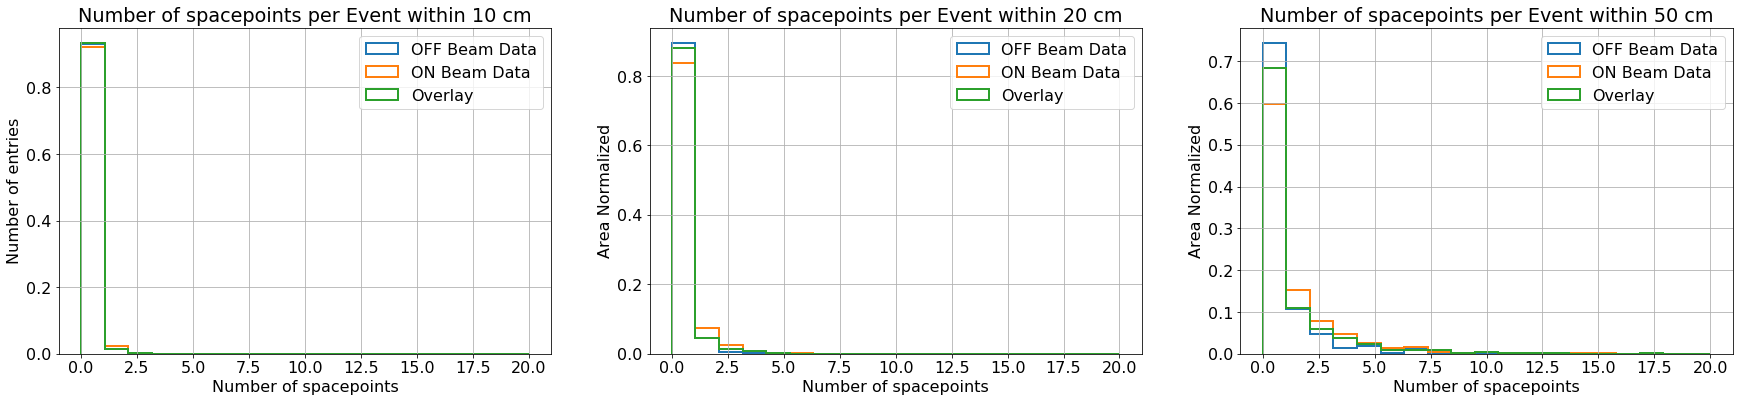

In [23]:
BINS = np.linspace(0,20,20)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['N_sps10'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps10'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps10'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 10 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)
plt.hist(df_Event_beam_off['N_sps20'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps20'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps20'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 20 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)

plt.subplot(1, 3, 3)
plt.hist(df_Event_beam_off['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 50 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=500)

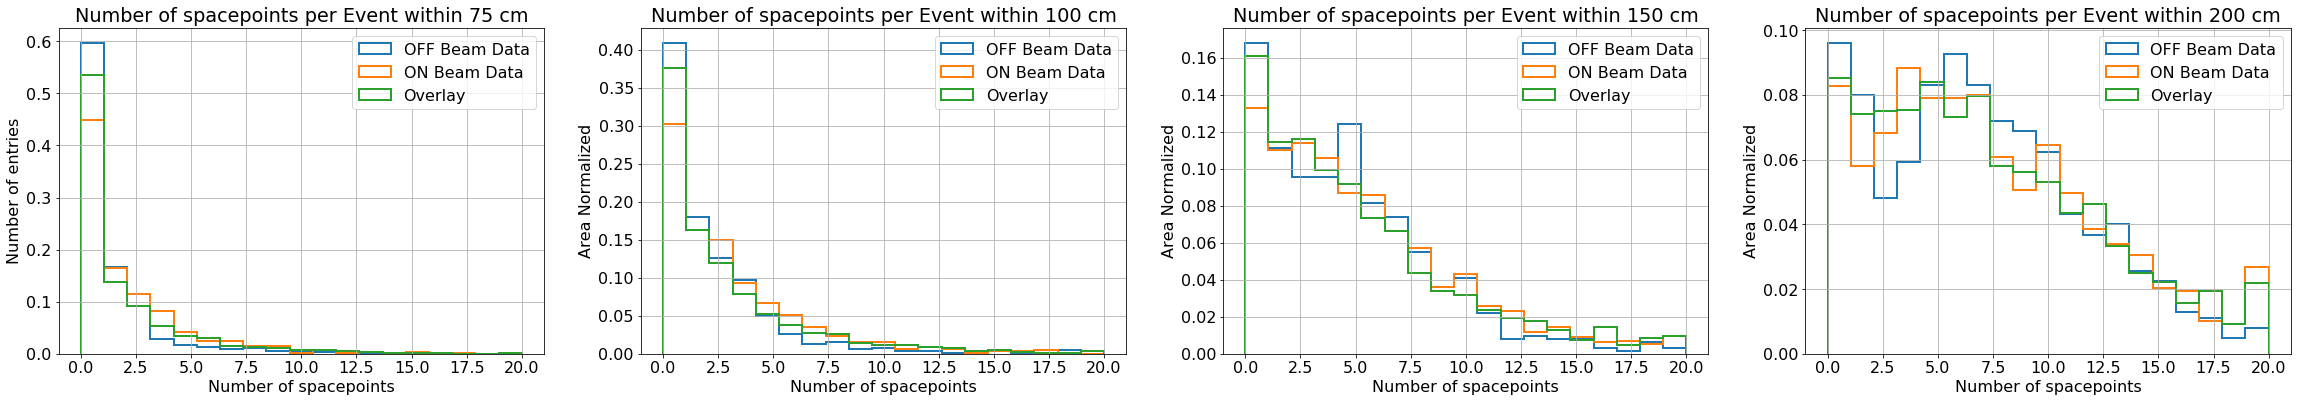

In [24]:
BINS = np.linspace(0,20,20)

fig = plt.figure(figsize=(40,6))
plt.subplot(1, 4, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['N_sps75'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps75'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps75'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 75 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 4, 2)
plt.hist(df_Event_beam_off['N_sps100'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps100'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps100'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 100 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)

plt.subplot(1, 4, 3)
plt.hist(df_Event_beam_off['N_sps150'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps150'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps150'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 150 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)


plt.subplot(1, 4, 4)
plt.hist(df_Event_beam_off['N_sps200'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps200'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps200'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 200 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=507

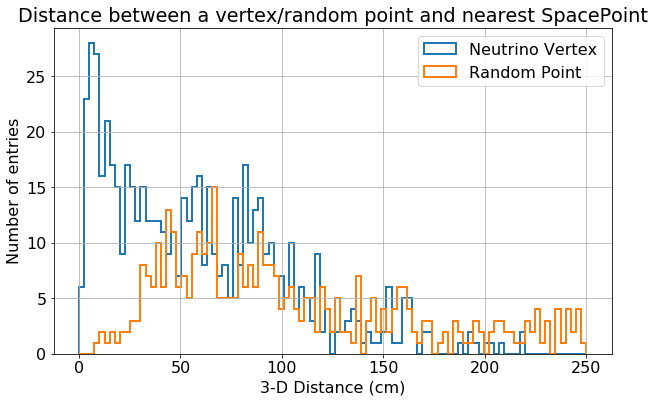

In [25]:
BINS = np.linspace(0,250,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_off['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='Neutrino Vertex')
plt.hist(df_Event_beam_off['distance_smallest_rand_vtx'].values,bins=BINS,histtype='step',lw=2,label='Random Point')

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex/random point and nearest SpacePoint")
plt.xlabel('3-D Distance (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

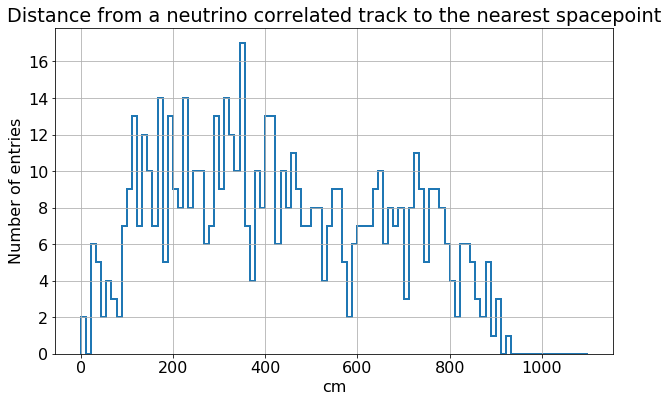

In [26]:
BINS = np.linspace(0,1100,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_off['distance_smallest_nu'].values,bins=BINS,histtype='step',lw=2)

#plt.legend(loc=1)

plt.grid()
plt.title("Distance from a neutrino correlated track to the nearest spacepoint")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

In [27]:
nOFF_Event = len(df_Event_beam_off)
weightsOFF_Event = np.ones(nOFF_Event) * off_scaling # factor needed to scale off-beam to on-beam
weightsOFF_Event_neutrino = np.ones(nOFF_Event) * off_scaling_neutrino # factor needed to scale off-beam to on-beam

nOverlay_Event = len(df_Event_overlay)
weightsOverlay_Event = np.ones(nOverlay_Event) * overlay_scaling # factor needed to scale Overlay to on-beam
weightsOverlay_Event_neutrino = np.ones(nOverlay_Event) * overlay_scaling_neutrino # factor needed to scale Overlay to on-beam

nON_Event  = len(df_Event_beam_on)
weightsON_Event  = np.ones(nON_Event)
weightsON_Event_neutrino  = np.ones(nON_Event)* on_scaling_neutrino

nlyattn_Event = len(df_Event_lyattn)
weightslyattn_Event = np.ones(nlyattn_Event) * lyattn_scaling # factor needed to scale Overlay to on-beam

nlydown_Event = len(df_Event_lydown)
weightslydown_Event = np.ones(nlydown_Event) * lydown_scaling

nlyrayleigh_Event = len(df_Event_lyrayleigh)
weightslyrayleigh_Event = np.ones(nlyrayleigh_Event) * lyrayleigh_scaling

nwiremodaxz_Event = len(df_Event_wiremodaxz)
weightswiremodaxz_Event = np.ones(nwiremodaxz_Event) * wiremodaxz_scaling

nwiremodayz_Event = len(df_Event_wiremodayz)
weightswiremodayz_Event = np.ones(nwiremodayz_Event) * wiremodayz_scaling

nwiremodx_Event = len(df_Event_wiremodx)
weightswiremodx_Event = np.ones(nwiremodx_Event) * wiremodx_scaling

nwiremodyz_Event = len(df_Event_wiremodyz)
weightswiremodyz_Event = np.ones(nwiremodyz_Event) * wiremodyz_scaling

nwiremoddedx_Event = len(df_Event_wiremoddedx)
weightswiremoddedx_Event = np.ones(nwiremoddedx_Event) * wiremoddedx_scaling


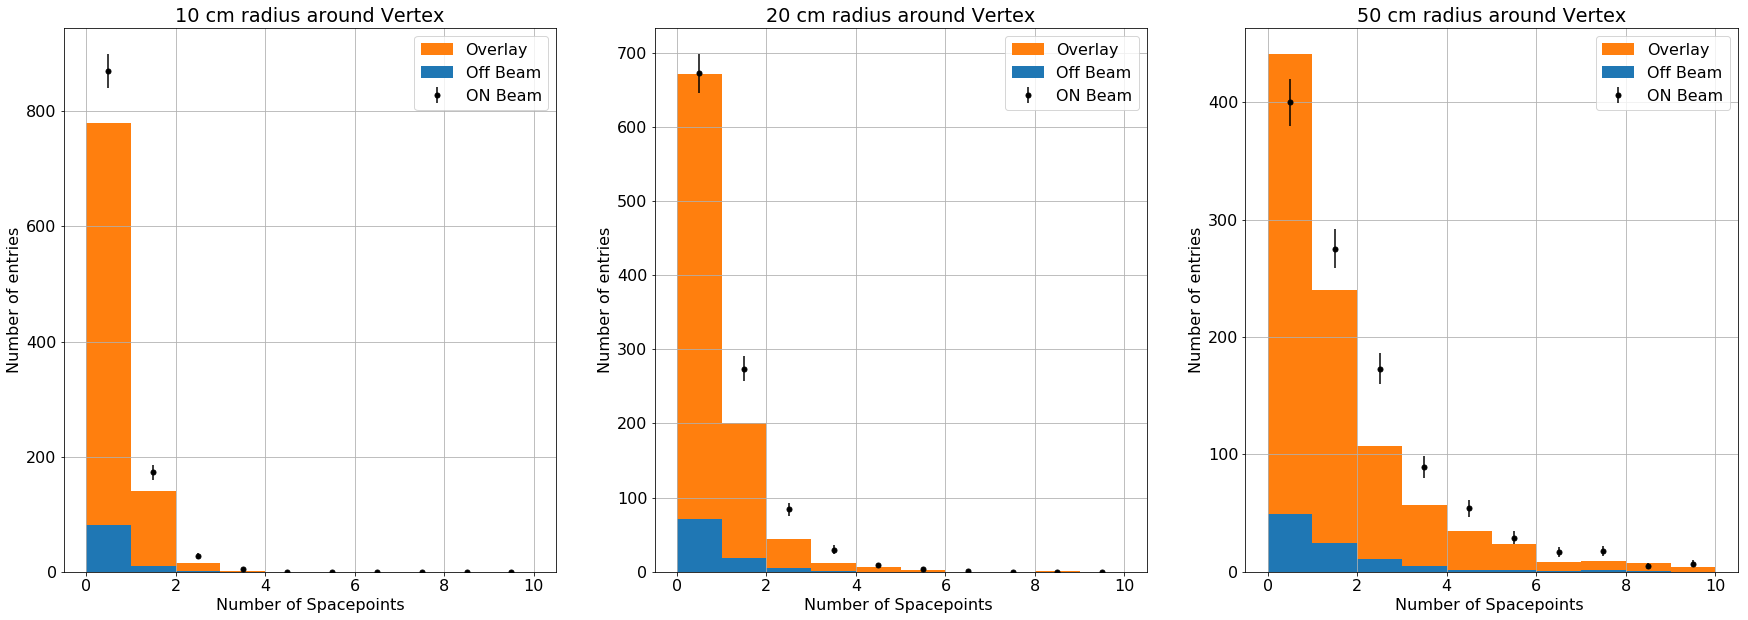

In [28]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off['N_sps10'].values,df_Event_overlay['N_sps10'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['N_sps10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 3, 2)

xstacked = [df_Event_beam_off['N_sps20'].values,df_Event_overlay['N_sps20'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()


plt.subplot(1, 3, 3)

xstacked = [df_Event_beam_off['N_sps50'].values,df_Event_overlay['N_sps50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

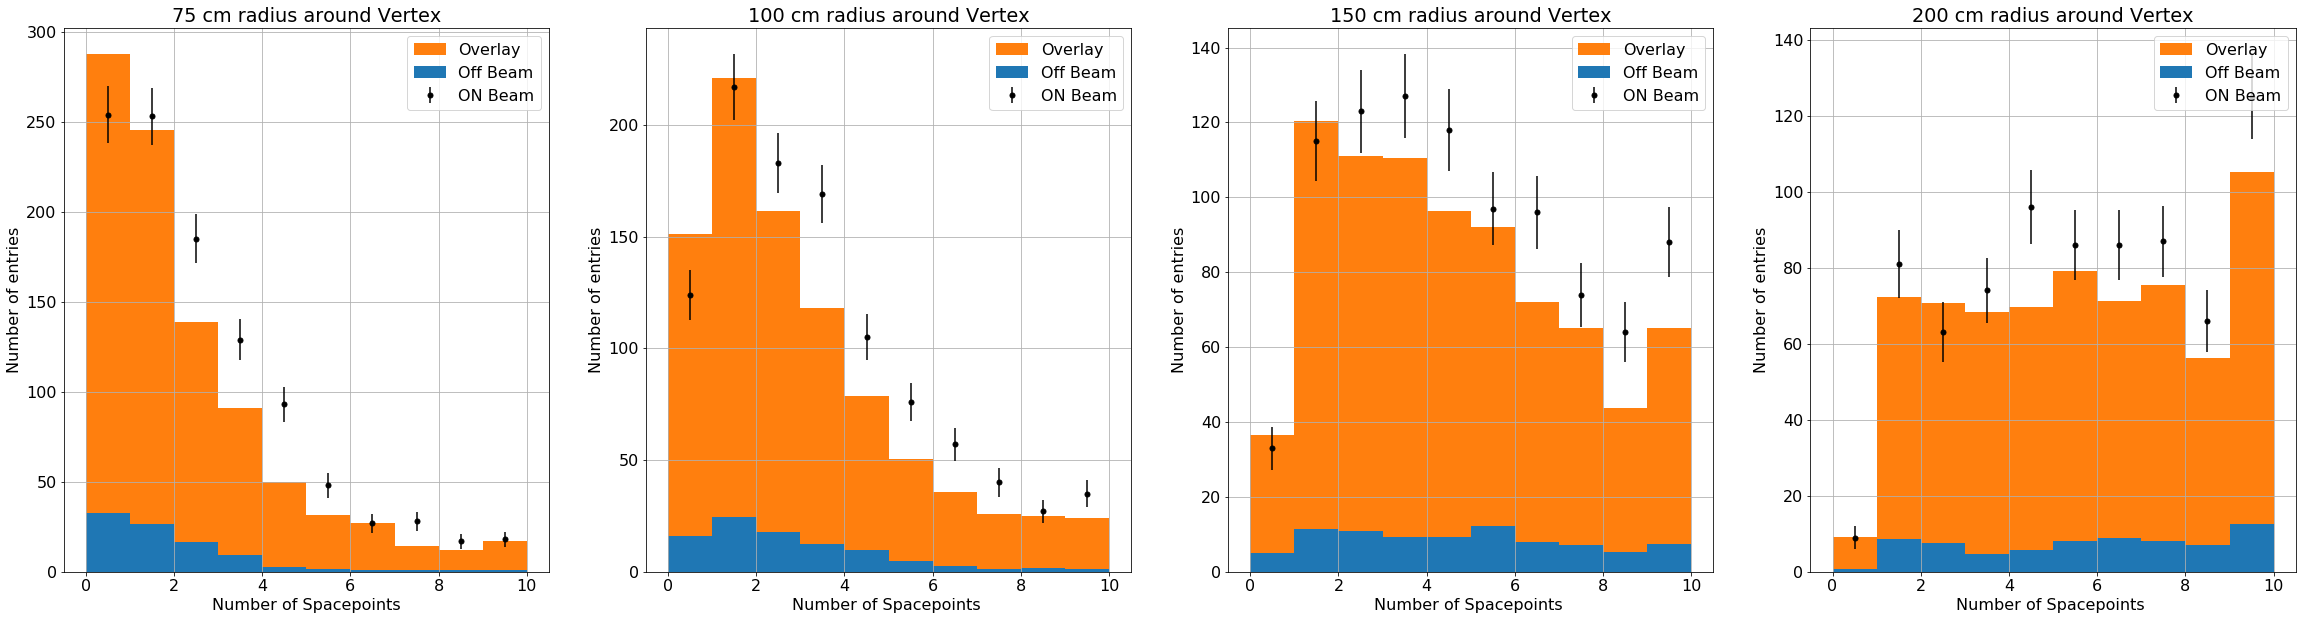

In [29]:
fig = plt.figure(figsize=(40,10))

plt.subplot(1, 4, 1)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off['N_sps75'].values,df_Event_overlay['N_sps75'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['N_sps75'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("75 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 2)

xstacked = [df_Event_beam_off['N_sps100'].values,df_Event_overlay['N_sps100'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps100'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("100 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()


plt.subplot(1, 4, 3)

xstacked = [df_Event_beam_off['N_sps150'].values,df_Event_overlay['N_sps150'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps150'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("150 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 4)

xstacked = [df_Event_beam_off['N_sps200'].values,df_Event_overlay['N_sps200'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps200'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("200 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

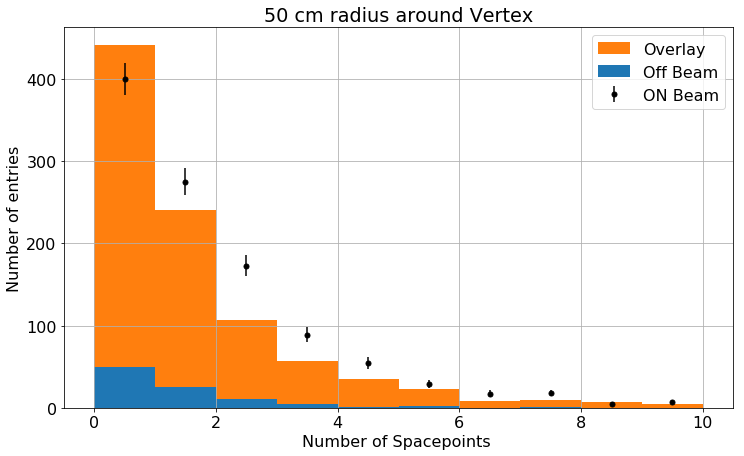

In [30]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,10,11)


xstacked = [df_Event_beam_off['N_sps50'].values,df_Event_overlay['N_sps50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
fig.savefig('counting_blips_POT_norm_G10_removed',dpi=500)

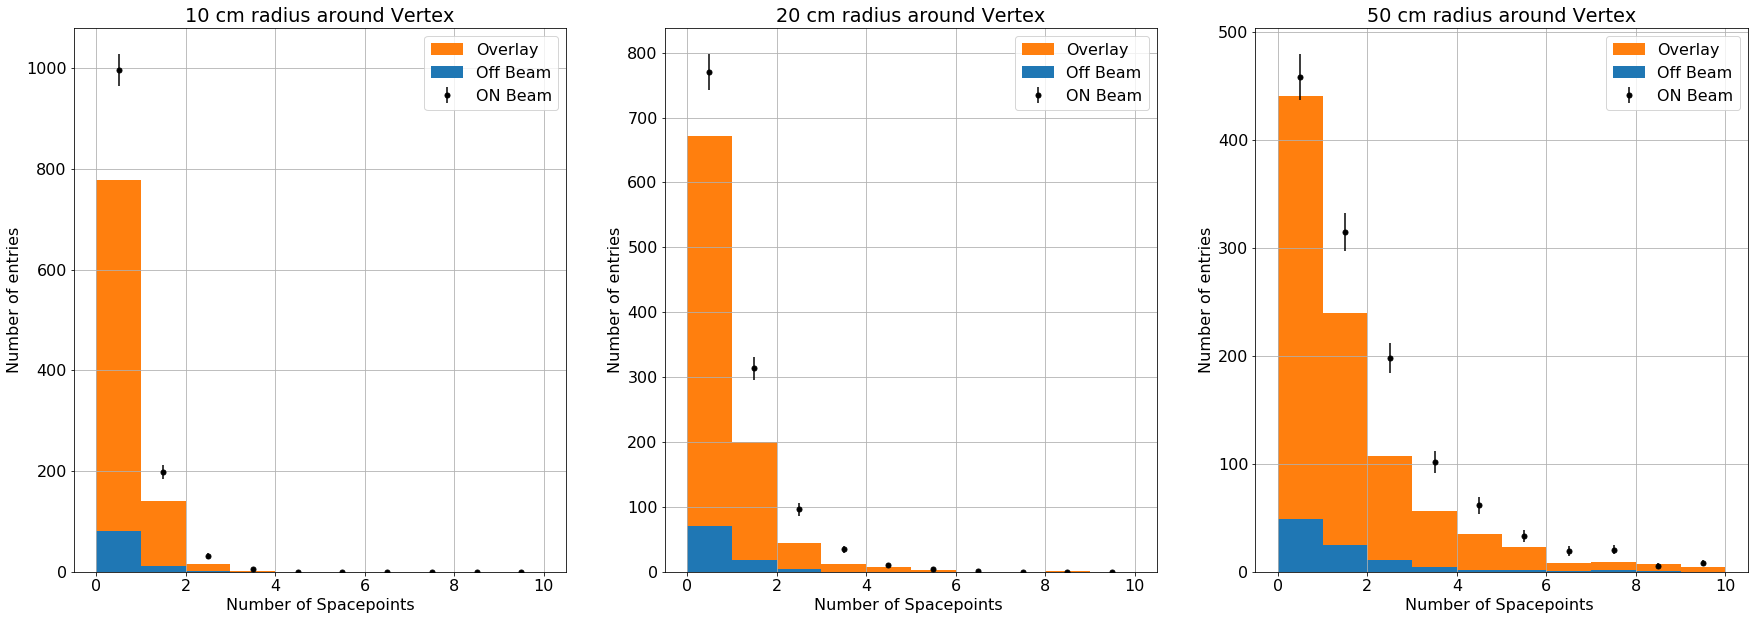

In [31]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off['N_sps10'].values,df_Event_overlay['N_sps10'].values]

WEIGHTS_Event_neutrino = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['N_sps10'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 3, 2)

xstacked = [df_Event_beam_off['N_sps20'].values,df_Event_overlay['N_sps20'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps20'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()


plt.subplot(1, 3, 3)

xstacked = [df_Event_beam_off['N_sps50'].values,df_Event_overlay['N_sps50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps50'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

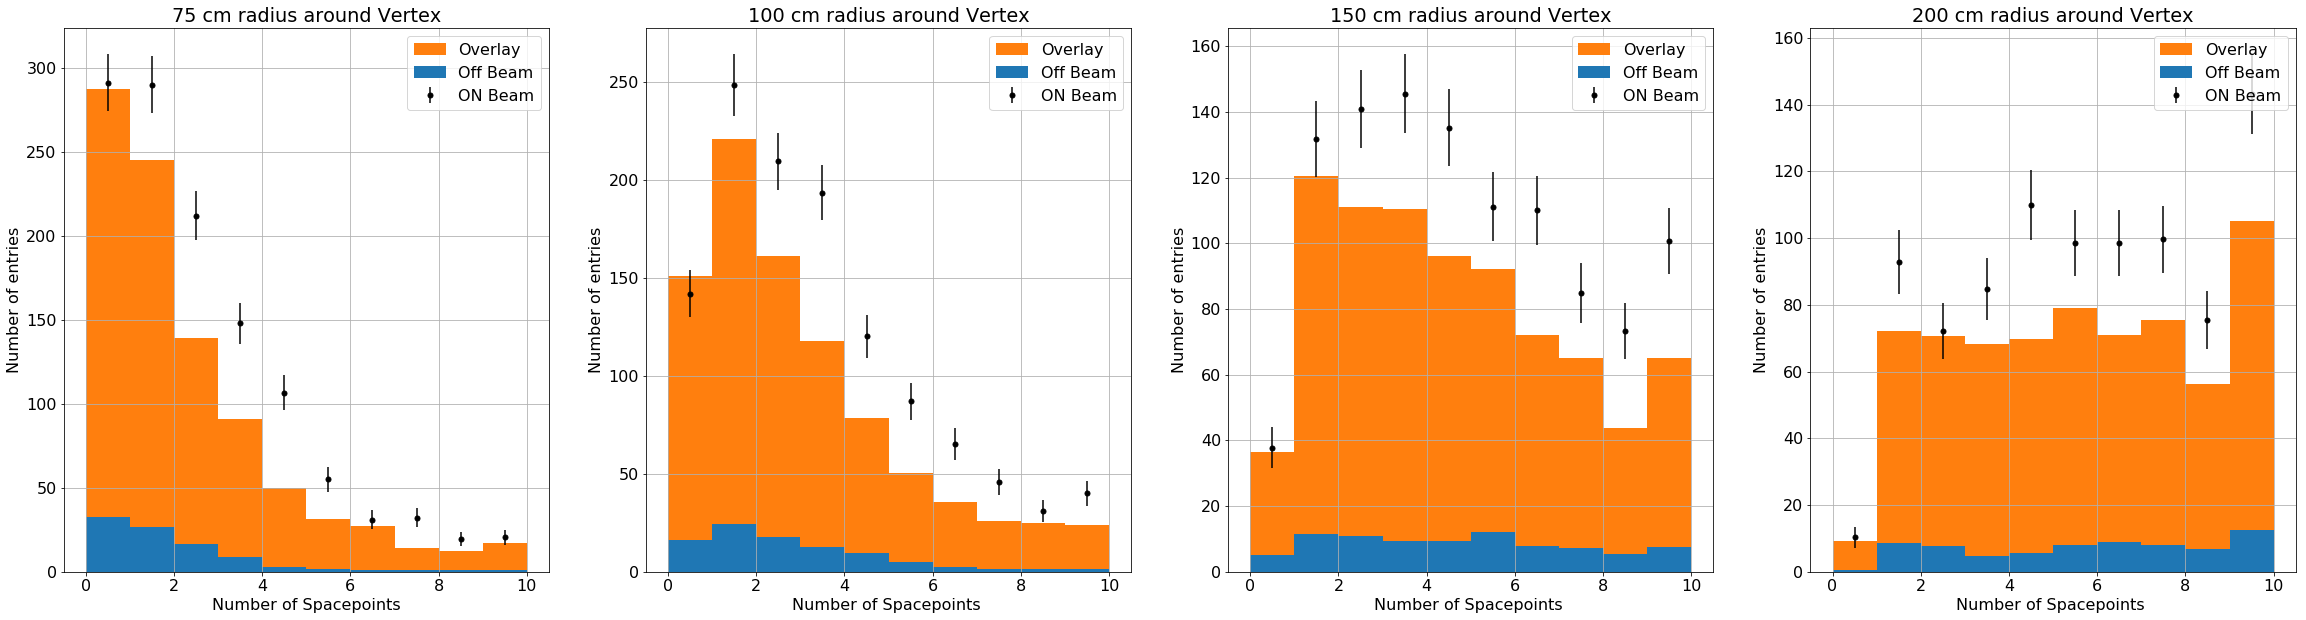

In [32]:
fig = plt.figure(figsize=(40,10))

plt.subplot(1, 4, 1)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off['N_sps75'].values,df_Event_overlay['N_sps75'].values]

WEIGHTS_Event_neutrino = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['N_sps75'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("75 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 2)

xstacked = [df_Event_beam_off['N_sps100'].values,df_Event_overlay['N_sps100'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps100'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("100 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()


plt.subplot(1, 4, 3)

xstacked = [df_Event_beam_off['N_sps150'].values,df_Event_overlay['N_sps150'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps150'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("150 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 4)

xstacked = [df_Event_beam_off['N_sps200'].values,df_Event_overlay['N_sps200'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps200'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("200 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

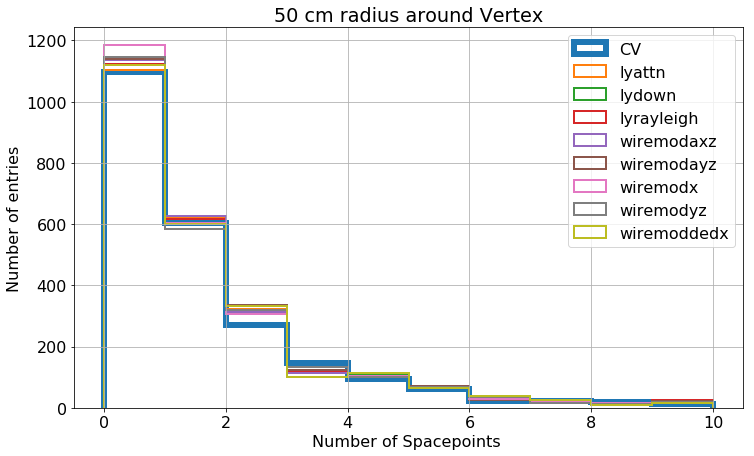

In [33]:
fig = plt.figure(figsize=(12,7))

BINS = np.linspace(0,10,11)

plt.hist(df_Event_overlay['N_sps50'].values,bins=BINS,histtype='step',lw=6,label='CV')
plt.hist(df_Event_lyattn['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='lyattn',weights=weightslyattn_Event)
plt.hist(df_Event_lydown['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='lydown',weights=weightslydown_Event)
plt.hist(df_Event_lyrayleigh['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='lyrayleigh',weights=weightslyrayleigh_Event)
plt.hist(df_Event_wiremodaxz['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='wiremodaxz',weights=weightswiremodaxz_Event)
plt.hist(df_Event_wiremodayz['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='wiremodayz',weights=weightswiremodayz_Event)
plt.hist(df_Event_wiremodx['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='wiremodx',weights=weightswiremodx_Event)
plt.hist(df_Event_wiremodyz['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='wiremodyz',weights=weightswiremodyz_Event)
plt.hist(df_Event_wiremoddedx['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='wiremoddedx',weights=weightswiremoddedx_Event)

plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)

plt.grid()
fig.savefig('counting_blips_CV-var_POT_norm', dpi=300)


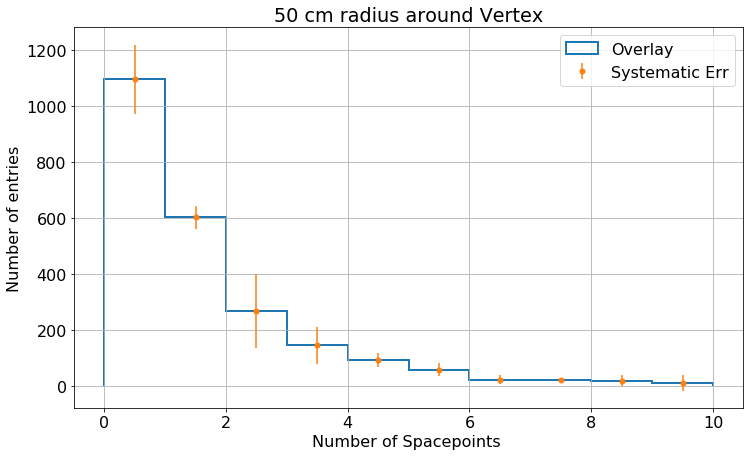

In [34]:
fig = plt.figure(figsize=(12,7))

BINS = np.linspace(0,10,11)

vals,bine = np.histogram(df_Event_overlay['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
vals1,bine1 = np.histogram(df_Event_lyattn['N_sps50'].values,bins=BINS,weights=weightslyattn_Event)
vals2,bine2 = np.histogram(df_Event_lydown['N_sps50'].values,bins=BINS,weights=weightslydown_Event)
vals3,bine3 = np.histogram(df_Event_lyrayleigh['N_sps50'].values,bins=BINS,weights=weightslyrayleigh_Event)
vals4,bine4 = np.histogram(df_Event_wiremodaxz['N_sps50'].values,bins=BINS,weights=weightswiremodaxz_Event)
vals5,bine5 = np.histogram(df_Event_wiremodayz['N_sps50'].values,bins=BINS,weights=weightswiremodayz_Event)
vals6,bine6 = np.histogram(df_Event_wiremodx['N_sps50'].values,bins=BINS,weights=weightswiremodx_Event)
vals7,bine7 = np.histogram(df_Event_wiremodyz['N_sps50'].values,bins=BINS,weights=weightswiremodyz_Event)
vals8,bine8 = np.histogram(df_Event_wiremoddedx['N_sps50'].values,bins=BINS,weights=weightswiremoddedx_Event)

bin_diff= np.sqrt((np.absolute(vals-vals1)/vals)**2 + (np.absolute(vals-vals2)/vals)**2 + (np.absolute(vals-vals3)/vals)**2 + (np.absolute(vals-vals4)/vals)**2 + (np.absolute(vals-vals5)/vals)**2 + (np.absolute(vals-vals6)/vals)**2 + (np.absolute(vals-vals7)/vals)**2 )

plt.hist(df_Event_overlay['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='Overlay')
plt.errorbar(binc,vals,yerr=bin_diff*vals,fmt='o',markersize=5,label='Systematic Err')
# plt.fill_between(binc,vals-(bin_diff*vals),vals+(bin_diff*vals),facecolor='r',alpha=0.5)
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()
plt.show()

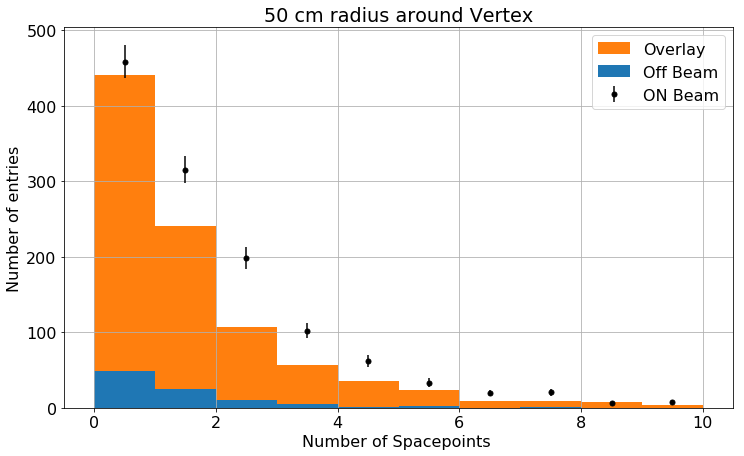

In [35]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,10,11)


xstacked = [df_Event_beam_off['N_sps50'].values,df_Event_overlay['N_sps50'].values]

LABELS = ['Off Beam','Overlay']


plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps50'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
fig.savefig('counting_blips_neutrino_norm_G10_removed', dpi=300)

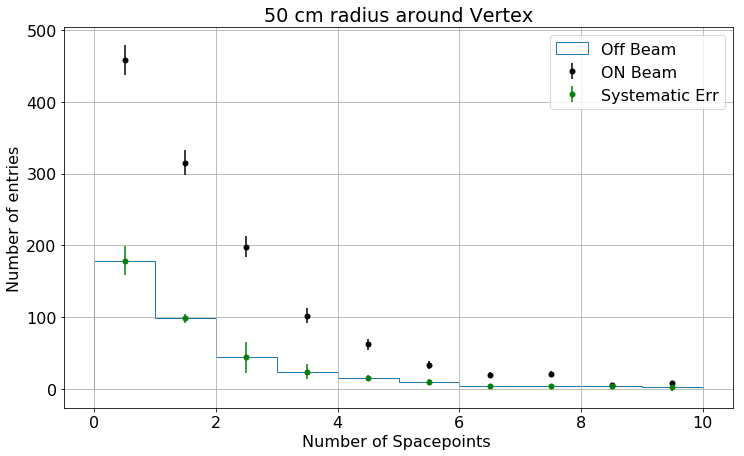

In [36]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,10,11)


plt.hist(df_Event_overlay['N_sps50'].values,bins=BINS,histtype='step',label=LABELS,weights=weightsOverlay_Event_neutrino)
vals,bine = np.histogram(df_Event_beam_on['N_sps50'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
vals_overlay,bine_overlay = np.histogram(df_Event_overlay['N_sps50'].values,bins=BINS,weights=weightsOverlay_Event_neutrino)
# vals_overlay,bine_overlay = np.histogram(xstacked,bins=BINS,weights=WEIGHTS_Event_neutrino)
plt.errorbar(binc,vals_overlay,yerr=bin_diff*vals_overlay,fmt='o',color='green',markersize=5,label='Systematic Err')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
# fig.savefig('counting_blips_neutrino_norm', dpi=300)

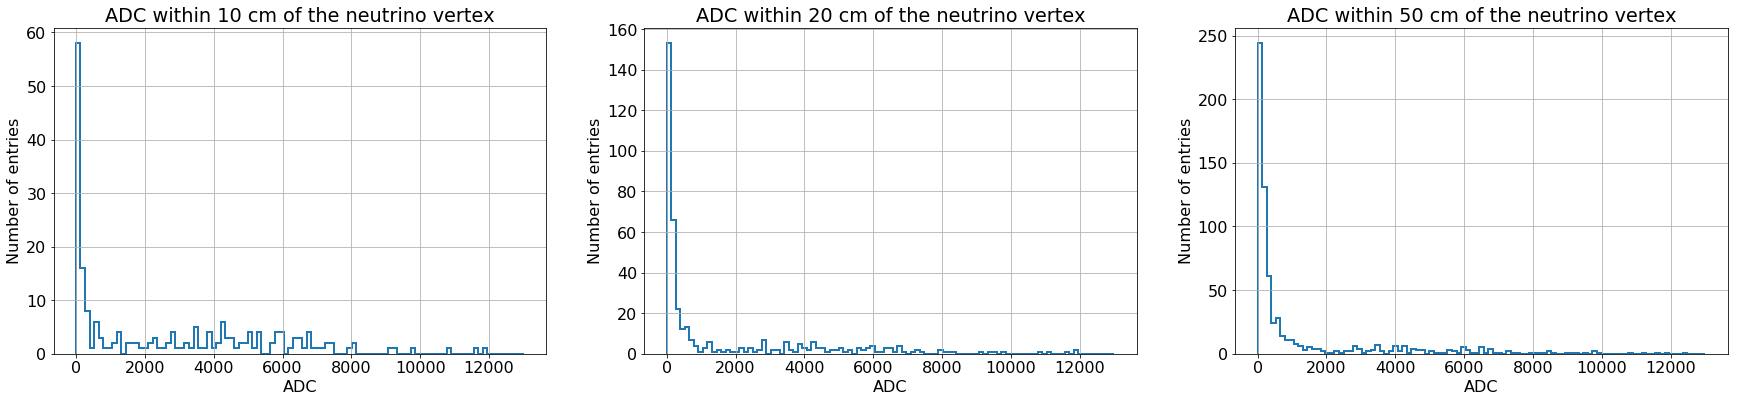

In [37]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(1,13000,100)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Event_beam_on['sps_cluster_charge10'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("ADC within 10 cm of the neutrino vertex")
plt.xlabel('ADC')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(1,13000,100)
plt.hist(df_Event_beam_on['sps_cluster_charge20'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("ADC within 20 cm of the neutrino vertex")
plt.xlabel('ADC')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(1,13000,100)
plt.hist(df_Event_beam_on['sps_cluster_charge50'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("ADC within 50 cm of the neutrino vertex")
plt.xlabel('ADC')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

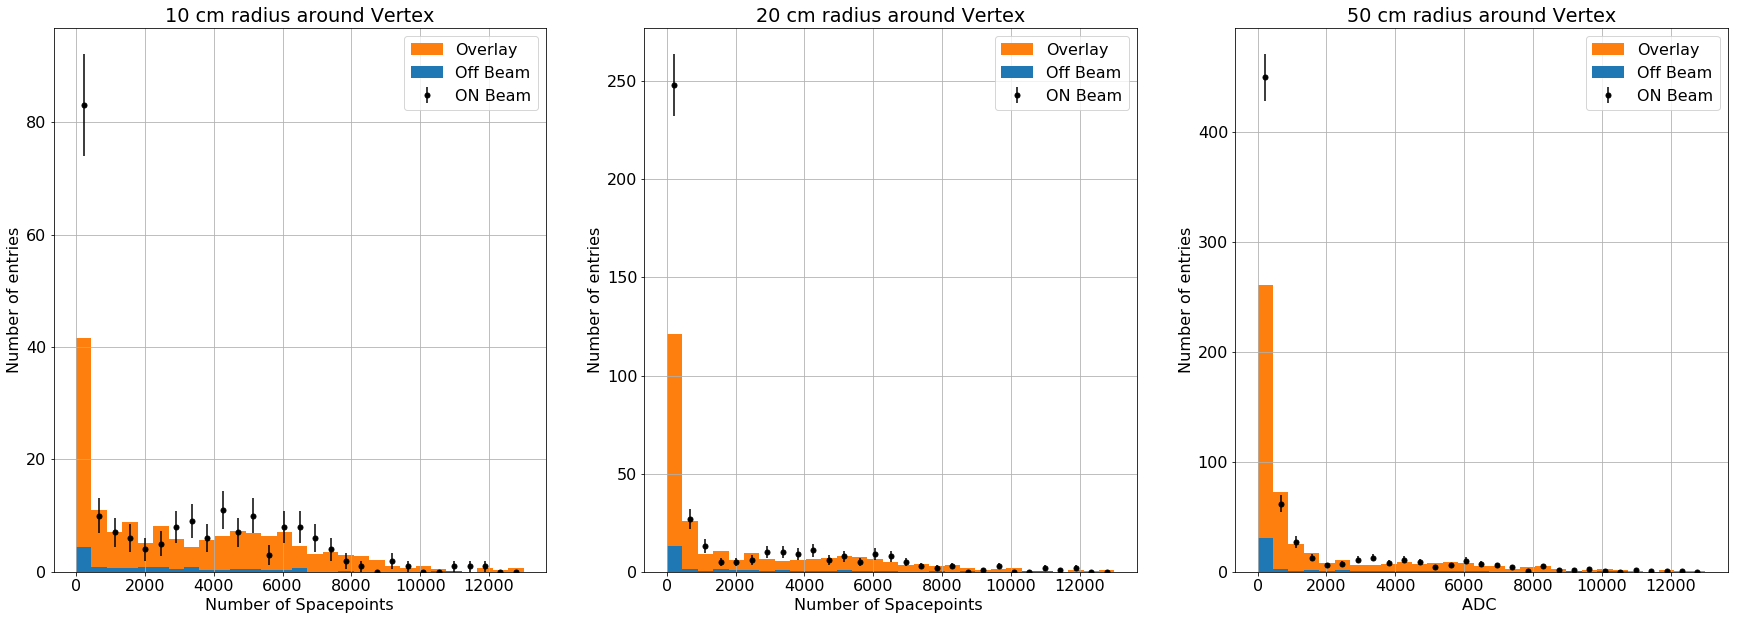

In [38]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(1,13000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge10'].values,df_Event_overlay['sps_cluster_charge10'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 3, 2)

xstacked = [df_Event_beam_off['sps_cluster_charge20'].values,df_Event_overlay['sps_cluster_charge20'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


plt.subplot(1, 3, 3)

xstacked = [df_Event_beam_off['sps_cluster_charge50'].values,df_Event_overlay['sps_cluster_charge50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

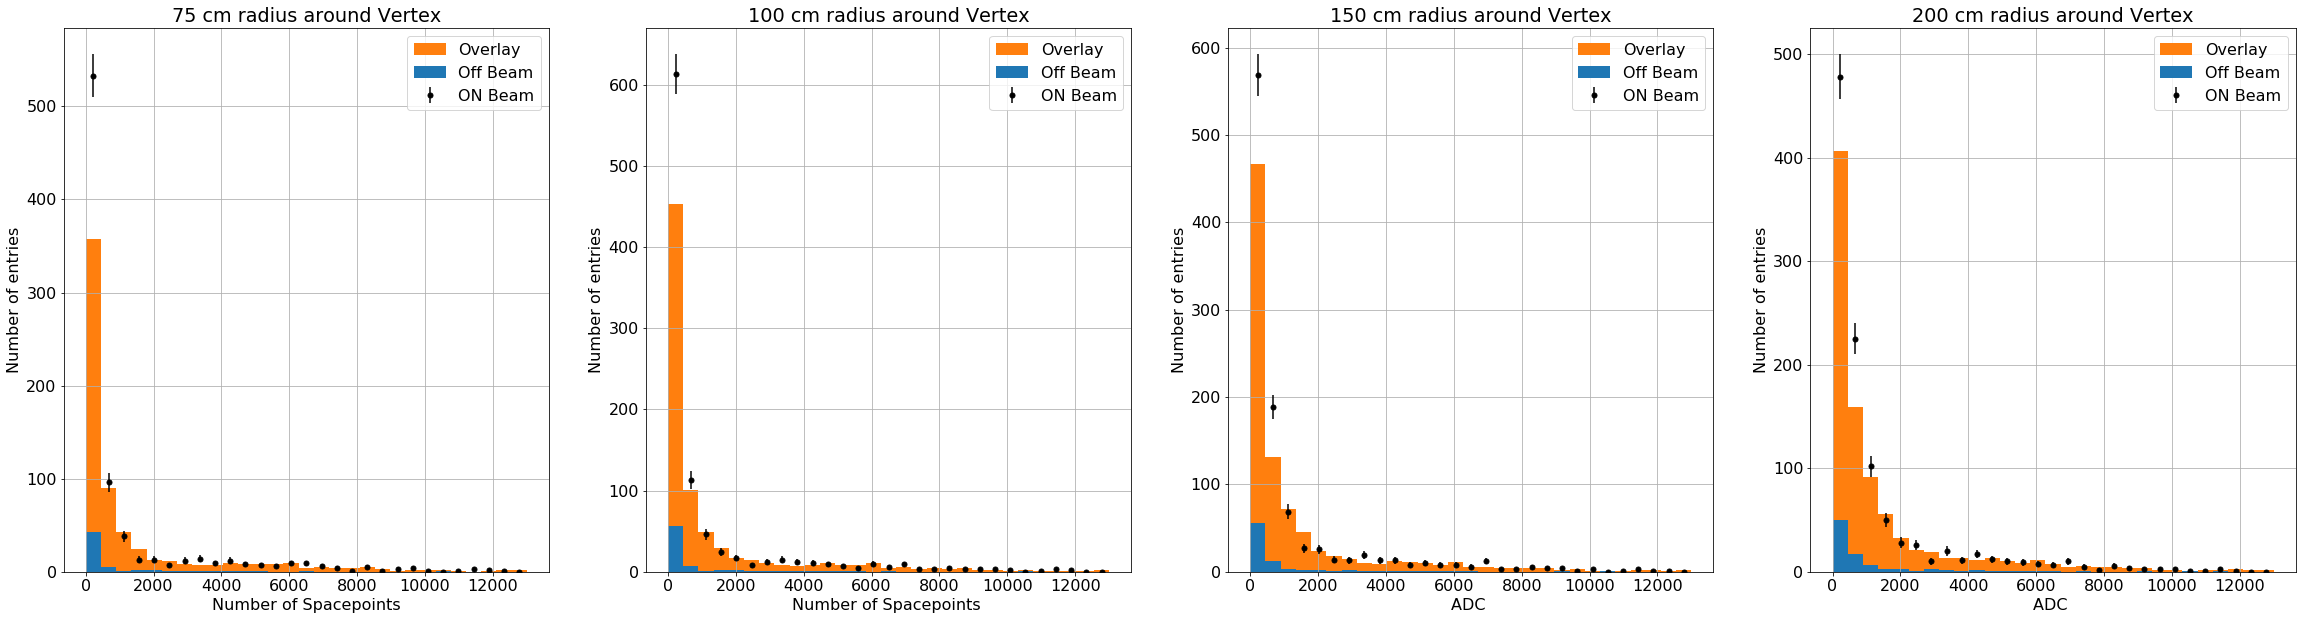

In [39]:
fig = plt.figure(figsize=(40,10))

plt.subplot(1, 4, 1)
BINS = np.linspace(1,13000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge75'].values,df_Event_overlay['sps_cluster_charge75'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge75'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("75 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 2)

xstacked = [df_Event_beam_off['sps_cluster_charge100'].values,df_Event_overlay['sps_cluster_charge100'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge100'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("100 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


plt.subplot(1, 4, 3)

xstacked = [df_Event_beam_off['sps_cluster_charge150'].values,df_Event_overlay['sps_cluster_charge150'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge150'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("150 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 4,4)

xstacked = [df_Event_beam_off['sps_cluster_charge200'].values,df_Event_overlay['sps_cluster_charge200'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge200'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("200 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

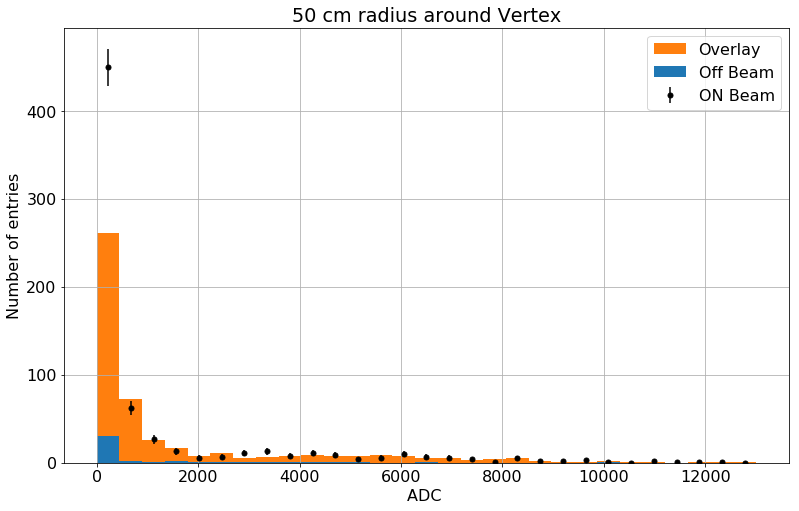

In [40]:

BINS = np.linspace(1,13000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge50'].values,df_Event_overlay['sps_cluster_charge50'].values]

LABELS = ['Off Beam','Overlay']
fig = plt.figure(figsize=(13,8))
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
fig.savefig('energy_excess', dpi=300)

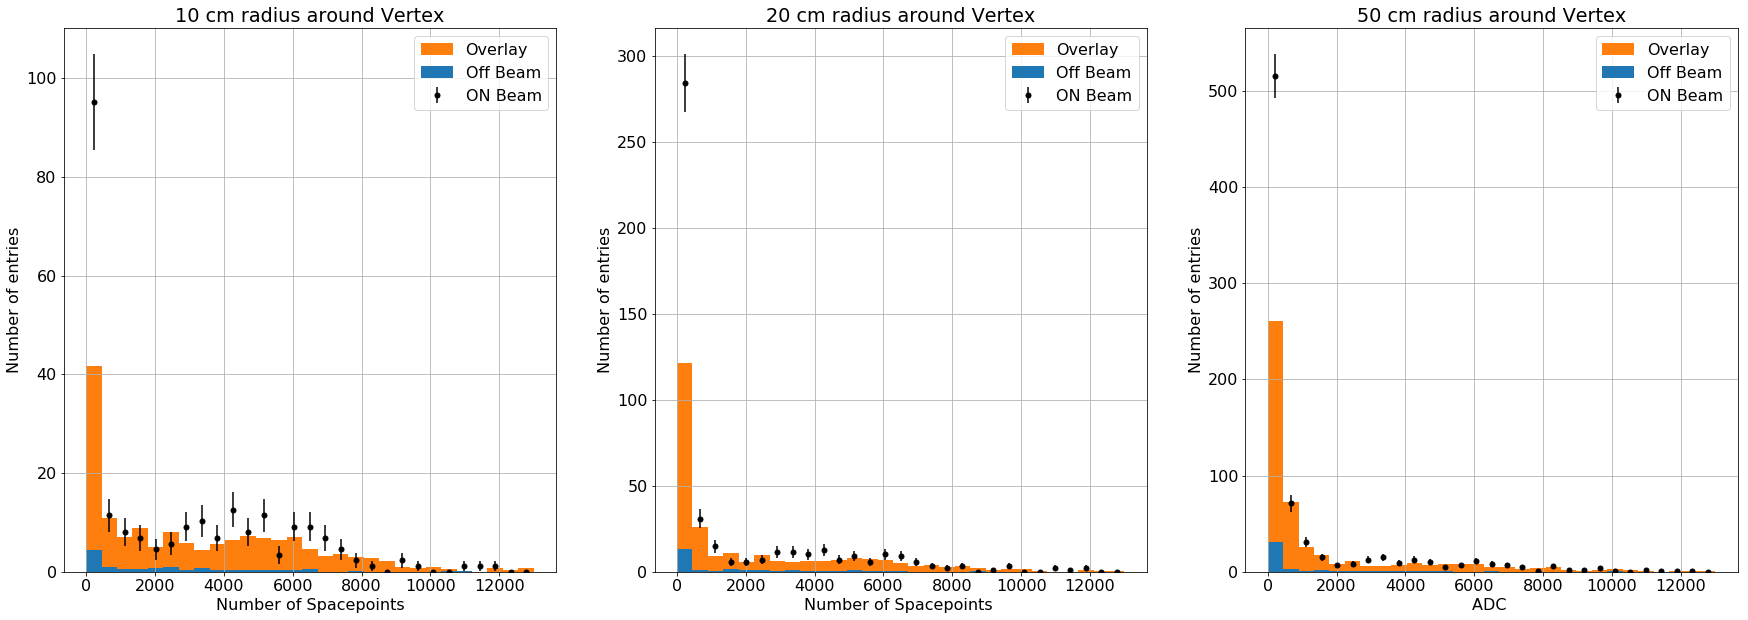

In [41]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(1,13000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge10'].values,df_Event_overlay['sps_cluster_charge10'].values]

WEIGHTS_Event_neutrino = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge10'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 3, 2)

xstacked = [df_Event_beam_off['sps_cluster_charge20'].values,df_Event_overlay['sps_cluster_charge20'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge20'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


plt.subplot(1, 3, 3)

xstacked = [df_Event_beam_off['sps_cluster_charge50'].values,df_Event_overlay['sps_cluster_charge50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge50'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

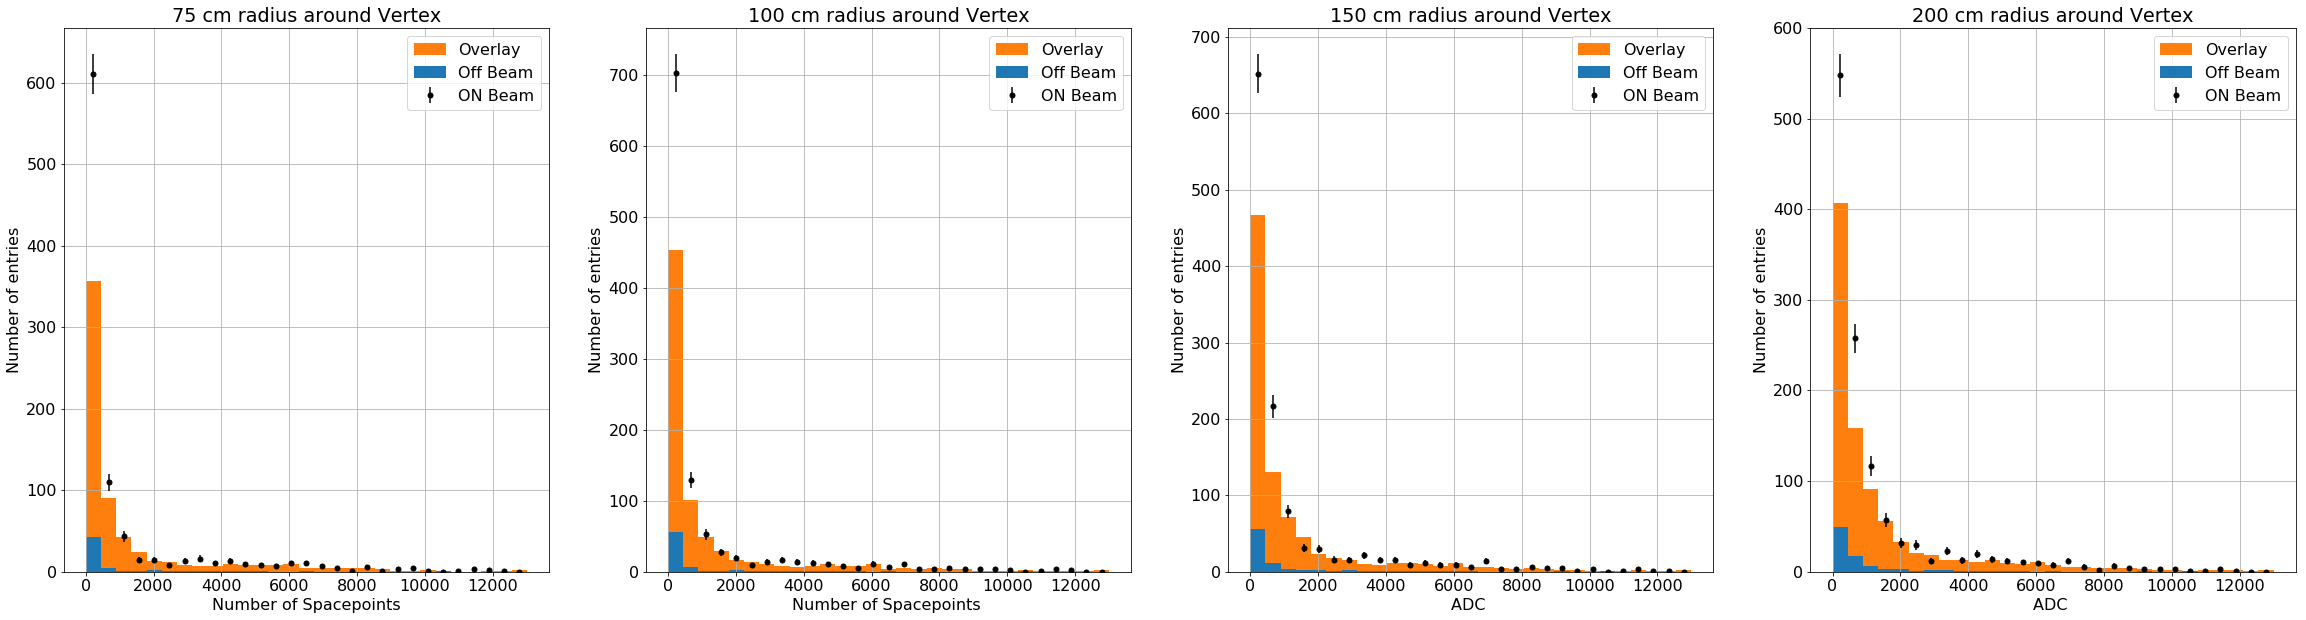

In [42]:
fig = plt.figure(figsize=(40,10))

plt.subplot(1, 4, 1)
BINS = np.linspace(1,13000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge75'].values,df_Event_overlay['sps_cluster_charge75'].values]

WEIGHTS_Event_neutrino = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge75'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("75 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 2)

xstacked = [df_Event_beam_off['sps_cluster_charge100'].values,df_Event_overlay['sps_cluster_charge100'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge100'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("100 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


plt.subplot(1, 4, 3)

xstacked = [df_Event_beam_off['sps_cluster_charge150'].values,df_Event_overlay['sps_cluster_charge150'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge150'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("150 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 4,4)

xstacked = [df_Event_beam_off['sps_cluster_charge200'].values,df_Event_overlay['sps_cluster_charge200'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_neutrino,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge200'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("200 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)_neutrino

In [43]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

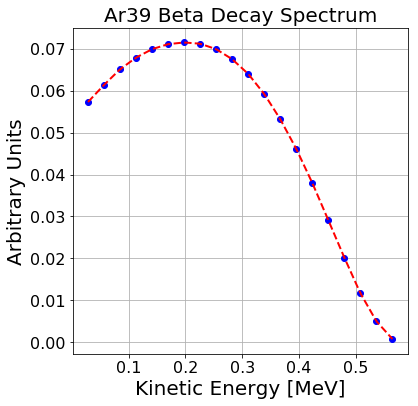

In [44]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

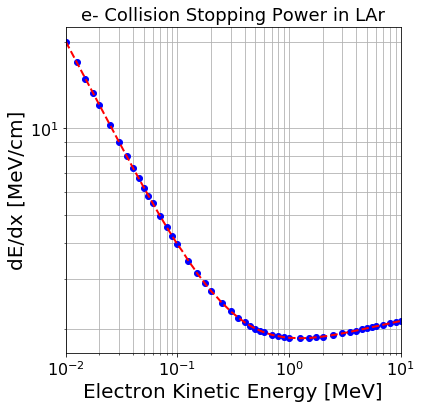

In [45]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

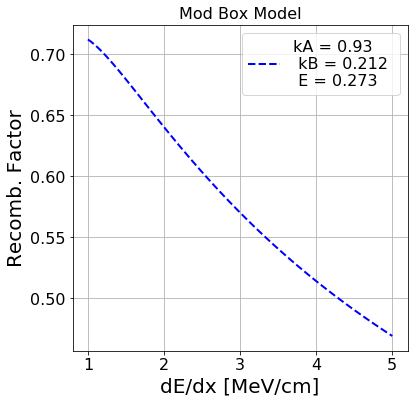

In [46]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

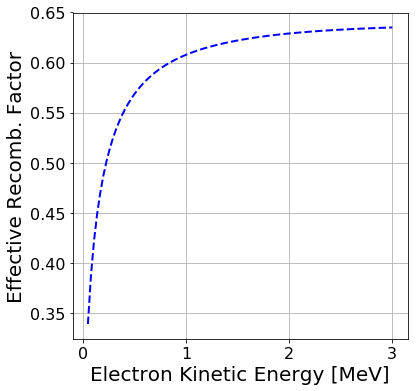

In [47]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



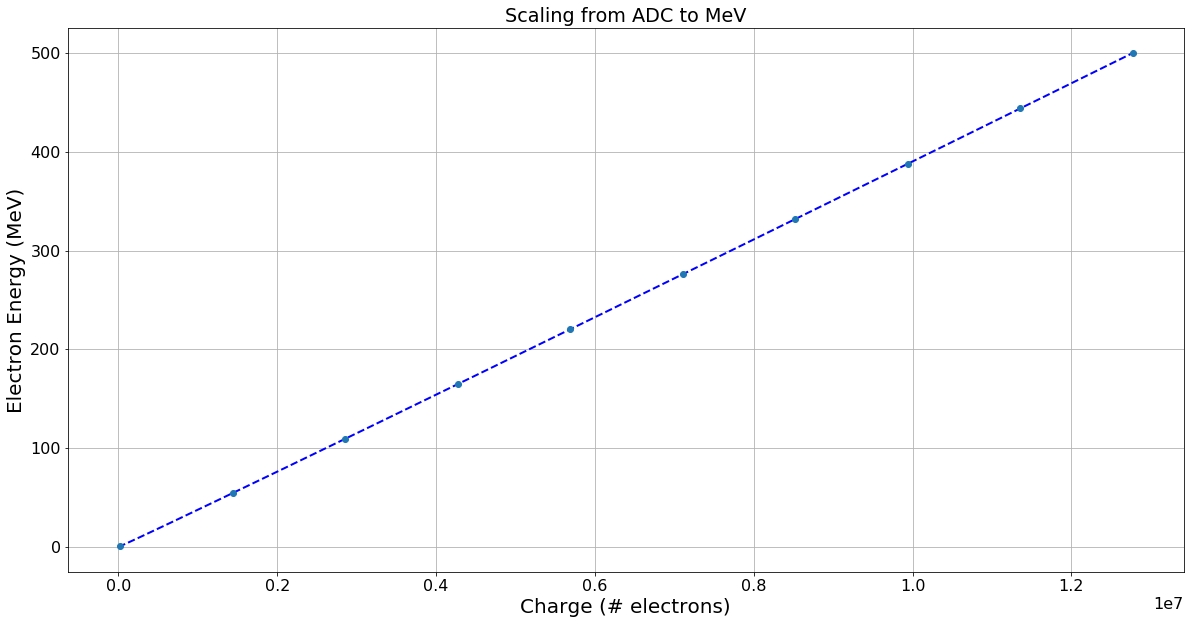

In [48]:
fig = plt.figure(figsize=(20,10))
Evals = np.linspace(0.00000001,500,500)
# Evals = np.linspace(0,30,500)

Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
# fig.savefig('Q2E.png', dpi=300)
# print (fQ2E(1425.54 * 238.4))
# print (fQ2E(521.225 * 238.4))
# print (fQ2E(2108.16 * 238.4))
# print (fQ2E(2026.97 * 238.4))
# print (fQ2E(1280.97 * 238.4))
# print (fQ2E(321.1692 * 238.4))



In [49]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.236479348558


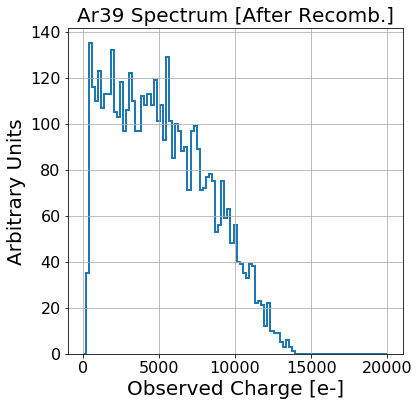

In [50]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [51]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

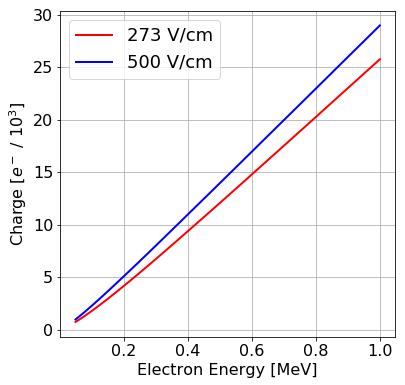

In [52]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [53]:
print Charge(0.2,0.273)


4129.221044959042


In [54]:
def E_recoY_off(df,gain):
    YQ_off = df['sps_cluster_charge50']
    QrecoY_off = YQ_off * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off = fQ2E(QrecoY_off)
    return ErecoY_off

def E_recoY_off10(df,gain):
    YQ_off10 = df['sps_cluster_charge10']
    QrecoY_off10 = YQ_off10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off10 = fQ2E(QrecoY_off10)
    return ErecoY_off10

def E_recoY_off20(df,gain):
    YQ_off20 = df['sps_cluster_charge20']
    QrecoY_off20 = YQ_off20 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off20 = fQ2E(QrecoY_off20)
    return ErecoY_off20


def E_recoY_overlay(df,gain):
    YQ_overlay = df['sps_cluster_charge50']
    QrecoY_overlay = YQ_overlay * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay = fQ2E(QrecoY_overlay)
    return ErecoY_overlay

def E_recoY_overlay_10(df,gain):
    YQ_overlay10 = df['sps_cluster_charge10']
    QrecoY_overlay10 = YQ_overlay10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay10 = fQ2E(QrecoY_overlay10)
    return ErecoY_overlay10

def E_recoY_overlay_20(df,gain):
    YQ_overlay20 = df['sps_cluster_charge10']
    QrecoY_overlay20 = YQ_overlay20 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay20 = fQ2E(QrecoY_overlay20)
    return ErecoY_overlay20


def E_recoY_on(df,gain):
    YQ_on  = df['sps_cluster_charge50']
    QrecoY_on = YQ_on * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on = fQ2E(QrecoY_on)
    return ErecoY_on


def E_recoY_on10(df,gain):
    YQ_on10  = df['sps_cluster_charge10']
    QrecoY_on10 = YQ_on10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on10 = fQ2E(QrecoY_on10)
    return ErecoY_on10

def E_recoY_on20(df,gain):
    YQ_on20  = df['sps_cluster_charge20']
    QrecoY_on20 = YQ_on20 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on20 = fQ2E(QrecoY_on20)
    return ErecoY_on20

In [55]:
df_sps_charge_50_off=df_Event_beam_off.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_off['energy']=E_recoY_off(df_sps_charge_50_off,238.4)

df_sps_charge_50_overlay=df_Event_overlay.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_overlay['energy']=E_recoY_overlay(df_sps_charge_50_overlay,238.4)

df_sps_charge_50_on=df_Event_beam_on.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_on['energy']=E_recoY_on(df_sps_charge_50_on,238.4)

df_sps_charge_10_off=df_Event_beam_off.query('sps_cluster_charge10 * 238.4 < 7140000. and sps_cluster_charge10 > 0.')
df_sps_charge_10_off['energy']=E_recoY_off10(df_sps_charge_10_off,238.4)

df_sps_charge_10_overlay=df_Event_overlay.query('sps_cluster_charge10 * 238.4 < 7140000. and sps_cluster_charge10 > 0.')
df_sps_charge_10_overlay['energy']=E_recoY_overlay_10(df_sps_charge_10_overlay,238.4)

df_sps_charge_10_on=df_Event_beam_on.query('sps_cluster_charge10 * 238.4 < 7140000. and sps_cluster_charge10 > 0.')
df_sps_charge_10_on['energy']=E_recoY_on10(df_sps_charge_10_on,238.4)

# df_sps_charge_20_off=df_Event_beam_off.query('sps_cluster_charge20 * 238.4 < 7140000. and sps_cluster_charge20 > 0.')
# df_sps_charge_20_off['energy']=E_recoY_off20(df_sps_charge_20_off,238.4)

# df_sps_charge_20_overlay=df_Event_overlay.query('sps_cluster_charge20 * 238.4 < 7140000. and sps_cluster_charge20 > 0.')
# df_sps_charge_20_overlay['energy']=E_recoY_overlay_20(df_sps_charge_20_overlay,238.4)

# df_sps_charge_20_on=df_Event_beam_on.query('sps_cluster_charge20 * 238.4 < 7140000. and sps_cluster_charge20 > 0.')
# df_sps_charge_20_on['energy']=E_recoY_on20(df_sps_charge_20_on,238.4)



df_sps_charge_50_lyattn=df_Event_lyattn.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_lyattn['energy']=E_recoY_overlay(df_sps_charge_50_lyattn,238.4)

df_sps_charge_50_lydown=df_Event_lydown.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_lydown['energy']=E_recoY_overlay(df_sps_charge_50_lydown,238.4)

df_sps_charge_50_lyrayleigh=df_Event_lyrayleigh.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_lyrayleigh['energy']=E_recoY_overlay(df_sps_charge_50_lyrayleigh,238.4)

df_sps_charge_50_wiremodaxz=df_Event_wiremodaxz.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_wiremodaxz['energy']=E_recoY_overlay(df_sps_charge_50_wiremodaxz,238.4)

df_sps_charge_50_wiremodayz=df_Event_wiremodayz.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_wiremodayz['energy']=E_recoY_overlay(df_sps_charge_50_wiremodayz,238.4)

df_sps_charge_50_wiremodyz=df_Event_wiremodyz.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_wiremodyz['energy']=E_recoY_overlay(df_sps_charge_50_wiremodyz,238.4)

df_sps_charge_50_wiremodx=df_Event_wiremodx.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_wiremodx['energy']=E_recoY_overlay(df_sps_charge_50_wiremodx,238.4)

df_sps_charge_50_wiremoddedx=df_Event_wiremoddedx.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_wiremoddedx['energy']=E_recoY_overlay(df_sps_charge_50_wiremoddedx,238.4)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

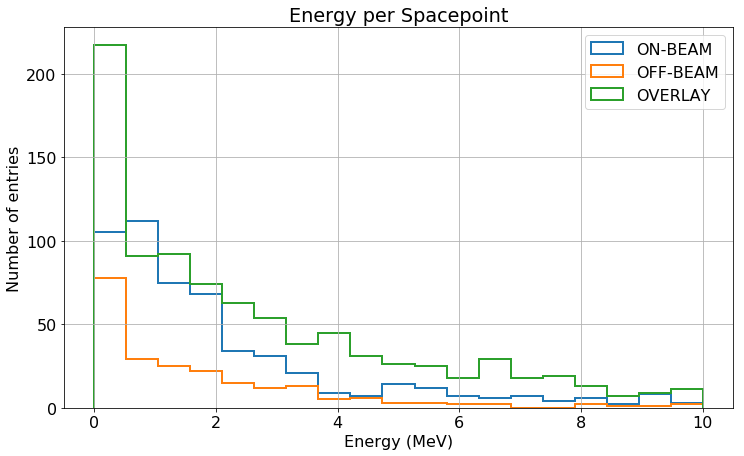

0.1251652459924276
0.09269621527468887
0.0689112326434456


In [56]:
BINS=np.linspace(0,10,20)

fig = plt.figure(figsize=(12,7))

plt.hist(df_sps_charge_50_on['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM')

plt.hist(df_sps_charge_50_off['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM')

plt.hist(df_sps_charge_50_overlay['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY')

plt.legend(loc=1)

plt.grid()
plt.title("Energy per Spacepoint")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')


plt.show()
# fig.savefig('Energy_run1_sps', dpi=400)
print(df_sps_charge_50_on['energy'].min())
print(df_sps_charge_50_off['energy'].min())
print(df_sps_charge_50_overlay['energy'].min())

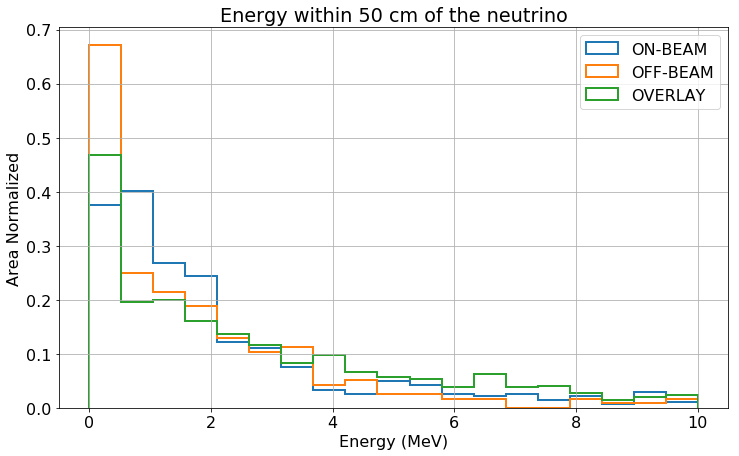

In [57]:
BINS=np.linspace(0,10,20)

fig = plt.figure(figsize=(12,7))
plt.hist(df_sps_charge_50_on['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM',density=True)
plt.hist(df_sps_charge_50_off['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM',density=True)
plt.hist(df_sps_charge_50_overlay['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY',density=True)

plt.legend(loc=1)

plt.grid()
plt.title("Energy within 50 cm of the neutrino")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')


plt.show()
# fig.savefig('Energy_run1_area_normalized', dpi=400)

In [58]:
noverlay_Event = len(df_sps_charge_50_overlay['energy'])
weightsoverlay_Event = np.ones(noverlay_Event) * overlay_scaling # factor needed to scale overlay to on-beam
weightsoverlay_Event_neutrino = np.ones(noverlay_Event) * overlay_scaling_neutrino * overlay_scaling

nOFF_Event = len(df_sps_charge_50_off['energy'])
weightsOFF_Event = np.ones(nOFF_Event) * off_scaling # factor needed to scale off-beam to on-beam
weightsOFF_Event_neutrino = np.ones(nOFF_Event) * off_scaling_neutrino * off_scaling # factor needed to scale off-beam to on-beam

nON_Event = len(df_sps_charge_50_on['energy'])
weightsON_Event_neutrino = np.ones(nON_Event) * on_scaling_neutrino # factor needed to scale off-beam to on-beam

nON_Event10 = len(df_sps_charge_10_on['energy'])
weightsON_Event_neutrino10 = np.ones(nON_Event10) * on_scaling_neutrino # factor needed to scale off-beam to on-beam


noverlay_Event10 = len(df_sps_charge_10_overlay['energy'])
weightsoverlay_Event10 = np.ones(noverlay_Event10) * overlay_scaling # factor needed to scale overlay to on-beam
weightsoverlay_Event_neutrino10 = np.ones(noverlay_Event10) * overlay_scaling_neutrino * overlay_scaling

nOFF_Event10 = len(df_sps_charge_10_off['energy'])
weightsOFF_Event10 = np.ones(nOFF_Event10) * off_scaling # factor needed to scale off-beam to on-beam
weightsOFF_Event_neutrino10 = np.ones(nOFF_Event10) * off_scaling_neutrino * off_scaling # factor needed to scale off-beam to on-beam

nON_Event10 = len(df_sps_charge_10_on['energy'])
weightsON_Event_neutrino10 = np.ones(nON_Event10) * on_scaling_neutrino # factor needed to scale off-beam to on-beam




WEIGHTS_Event = [weightsOFF_Event,weightsoverlay_Event]
WEIGHTS_Event_neutrino = [weightsOFF_Event_neutrino,weightsoverlay_Event_neutrino]




noverlay_Event = len(df_sps_charge_50_overlay['energy'])
weightsoverlay_Event = np.ones(noverlay_Event) * overlay_scaling # factor needed to scale overlay to on-beam
weightsoverlay_Event_neutrino = np.ones(noverlay_Event) * overlay_scaling_neutrino * overlay_scaling

nOFF_Event = len(df_sps_charge_50_off['energy'])
weightsOFF_Event = np.ones(nOFF_Event) * off_scaling # factor needed to scale off-beam to on-beam
weightsOFF_Event_neutrino = np.ones(nOFF_Event) * off_scaling_neutrino * off_scaling # factor needed to scale off-beam to on-beam

nON_Event = len(df_sps_charge_50_on['energy'])
weightsON_Event_neutrino = np.ones(nON_Event) * on_scaling_neutrino # factor needed to scale off-beam to on-beam


WEIGHTS_Event = [weightsOFF_Event,weightsoverlay_Event]
WEIGHTS_Event10 = [weightsOFF_Event10,weightsoverlay_Event10]
WEIGHTS_Event_neutrino = [weightsOFF_Event_neutrino,weightsoverlay_Event_neutrino]

nlyattn_Event = len(df_sps_charge_50_lyattn['energy'])
weightslyattn_Event = np.ones(nlyattn_Event) * lyattn_scaling # factor needed to scale overlay to on-beam

nlydown_Event = len(df_sps_charge_50_lydown['energy'])
weightslydown_Event = np.ones(nlydown_Event) * lydown_scaling # factor needed to scale overlay to on-beam

nlyrayleigh_Event = len(df_sps_charge_50_lyrayleigh['energy'])
weightslyrayleigh_Event = np.ones(nlyrayleigh_Event) * lyrayleigh_scaling # factor needed to scale overlay to on-beam

nwiremodaxz_Event = len(df_sps_charge_50_wiremodaxz['energy'])
weightswiremodaxz_Event = np.ones(nwiremodaxz_Event) * wiremodaxz_scaling # factor needed to scale overlay to on-beam

nwiremodayz_Event = len(df_sps_charge_50_wiremodayz['energy'])
weightswiremodayz_Event = np.ones(nwiremodayz_Event) * wiremodayz_scaling # factor needed to scale overlay to on-beam

nwiremodyz_Event = len(df_sps_charge_50_wiremodyz['energy'])
weightswiremodyz_Event = np.ones(nwiremodyz_Event) * wiremodyz_scaling # factor needed to scale overlay to on-beam


nwiremodx_Event = len(df_sps_charge_50_wiremodx['energy'])
weightswiremodx_Event = np.ones(nwiremodx_Event) * wiremodx_scaling # factor needed to scale overlay to on-beam

nwiremoddedx_Event = len(df_sps_charge_50_wiremoddedx['energy'])
weightswiremoddedx_Event = np.ones(nwiremoddedx_Event) * wiremoddedx_scaling # factor needed to scale overlay to on-beam


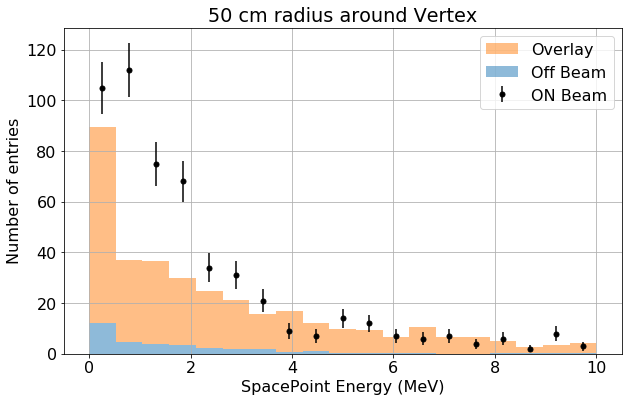

In [59]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,10,20)
xstacked = [df_sps_charge_50_off['energy'].values,df_sps_charge_50_overlay['energy'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Event)

vals,bine = np.histogram(df_sps_charge_50_on['energy'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
# plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()

fig.savefig('Energy_excess_POT_norm_G10_removed', dpi=500)

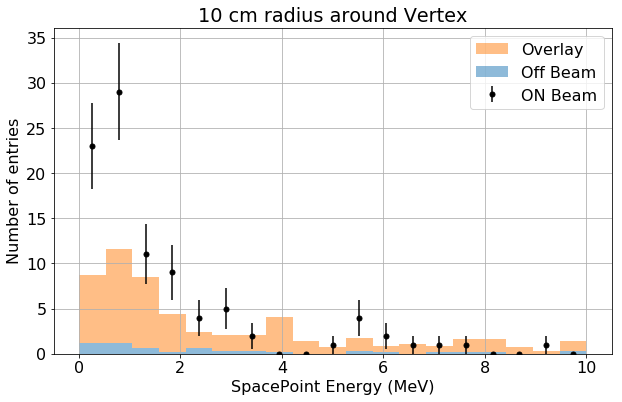

In [60]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,10,20)
xstacked = [df_sps_charge_10_off['energy'].values,df_sps_charge_10_overlay['energy'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Event10)

vals,bine = np.histogram(df_sps_charge_10_on['energy'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
# plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()



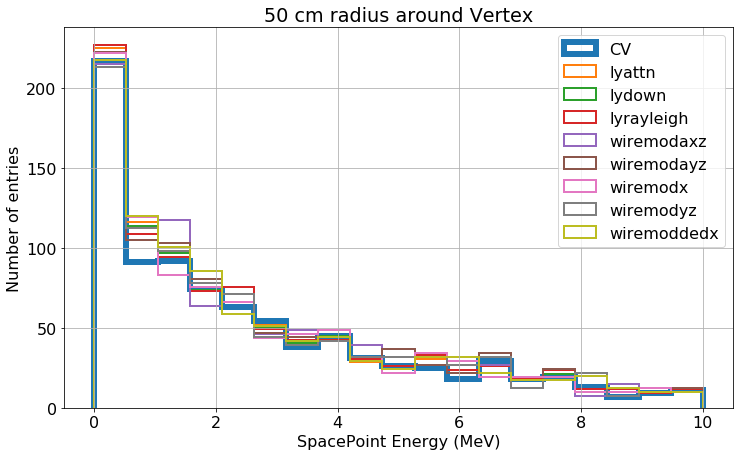

In [61]:
fig = plt.figure(figsize=(12,7))

BINS=np.linspace(0,10,20)

plt.hist(df_sps_charge_50_overlay['energy'].values,bins=BINS,histtype='step',lw=6,label='CV')
plt.hist(df_sps_charge_50_lyattn['energy'].values,bins=BINS,histtype='step',lw=2,label='lyattn',weights=weightslyattn_Event)
plt.hist(df_sps_charge_50_lydown['energy'].values,bins=BINS,histtype='step',lw=2,label='lydown',weights=weightslydown_Event)
plt.hist(df_sps_charge_50_lyrayleigh['energy'].values,bins=BINS,histtype='step',lw=2,label='lyrayleigh',weights=weightslyrayleigh_Event)
plt.hist(df_sps_charge_50_wiremodaxz['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodaxz',weights=weightswiremodaxz_Event)
plt.hist(df_sps_charge_50_wiremodayz['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodayz',weights=weightswiremodayz_Event)
plt.hist(df_sps_charge_50_wiremodx['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodx',weights=weightswiremodx_Event)
plt.hist(df_sps_charge_50_wiremodyz['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodyz',weights=weightswiremodyz_Event)
plt.hist(df_sps_charge_50_wiremoddedx['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremoddedx',weights=weightswiremoddedx_Event)

plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1)

plt.grid()
fig.savefig('Event_energy_CV-var_POT_norm', dpi=300)


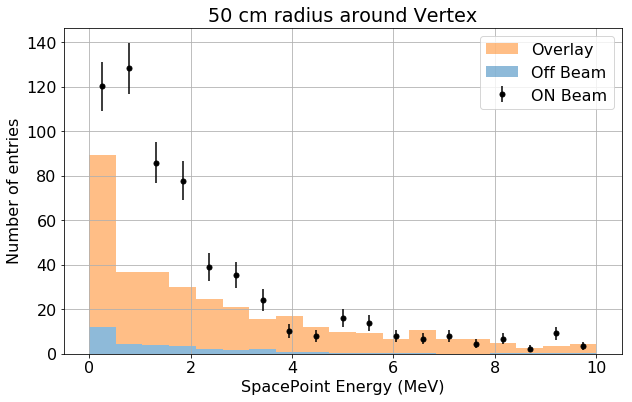

In [62]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,10,20)
xstacked = [df_sps_charge_50_off['energy'].values,df_sps_charge_50_overlay['energy'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Event)

vals,bine = np.histogram(df_sps_charge_50_on['energy'].values,bins=BINS,weights=weightsON_Event_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
# plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()
fig.savefig('Energy_excess_neutrino_norm_G10_removed', dpi=500)

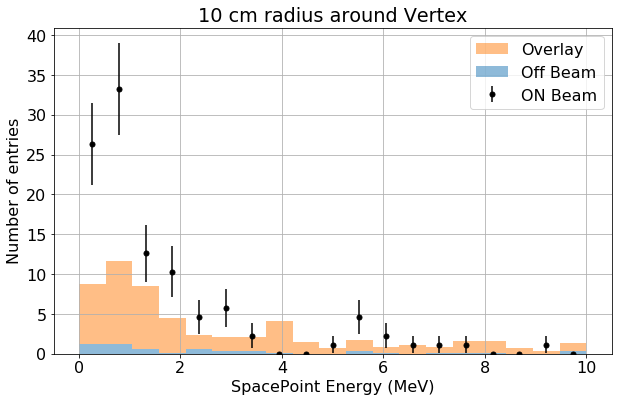

In [63]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,10,20)
xstacked = [df_sps_charge_10_off['energy'].values,df_sps_charge_10_overlay['energy'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Event10)

vals,bine = np.histogram(df_sps_charge_10_on['energy'].values,bins=BINS,weights=weightsON_Event_neutrino10)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
# plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()
